# 2. 한국거래소 전체 종목 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('krx.csv')

<br>

## 2.1 데이터 미리보기

In [3]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [4]:
# sample() : 랜덤하게 1개 리턴
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1707,023410,KOSDAQ,유진기업,"시멘트, 석회, 플라스터 및 그 제품 제조업",레미콘,1994-10-07,12월,최종성,http://www.eugenes.co.kr,경기도


<br>

## 2.2 데이터 요약하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          2614 non-null   object
 1   Market          2614 non-null   object
 2   Name            2614 non-null   object
 3   Sector          2411 non-null   object
 4   Industry        2392 non-null   object
 5   ListingDate     2411 non-null   object
 6   SettleMonth     2411 non-null   object
 7   Representative  2411 non-null   object
 8   HomePage        2239 non-null   object
 9   Region          2411 non-null   object
dtypes: object(10)
memory usage: 204.3+ KB


In [6]:
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,2614,2614,2614,2411,2392,2411,2411,2411,2239,2411
unique,2614,3,2614,158,2240,1777,9,2297,2218,21
top,002100,KOSDAQ,한일화학,특수 목적용 기계 제조업,기업인수합병,1996-07-03,12월,김상우,http://www.woory.com,서울특별시
freq,1,1471,1,141,37,8,2351,4,2,969


In [7]:
# 중복을 제외한 unique 값 확인
df.nunique()

Symbol            2614
Market               3
Name              2614
Sector             158
Industry          2240
ListingDate       1777
SettleMonth          9
Representative    2297
HomePage          2218
Region              21
dtype: int64

In [8]:
# index 값 보기
df.index

RangeIndex(start=0, stop=2614, step=1)

In [9]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [10]:
# 값 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '이현우',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호, 염두성 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [11]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6,7,8,9
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


<br>

## 2.3 데이터 색인하기

### 2.3.1 `Series`

In [12]:
# 하나의 컬럼 가져오기
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
2609    흥국화재2우B
2610      흥국화재우
2611       흥아해운
2612         희림
2613         힘스
Name: Name, Length: 2614, dtype: object

In [13]:
type(df['Name'])

pandas.core.series.Series

In [14]:
# 첫 번째 행 데이터 가져오기
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [15]:
type(df.loc[0])

pandas.core.series.Series

<br>

### 2.3.2 `DataFrame`

In [16]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
# 두 개 이상의 컬럼 가져오기 -> 각 컬럼명을 리스트 타입으로 지정
df[['Name', 'Symbol']]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
2609,흥국화재2우B,000547
2610,흥국화재우,000545
2611,흥아해운,003280
2612,희림,037440


In [19]:
type(df[['Name', 'Symbol']])

pandas.core.frame.DataFrame

In [20]:
# 두 개 이상의 행 가져오기 -> 각 인덱스를 리스트 타입으로 지정
df.loc[[0,1]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시


In [21]:
type(df.loc[[0, 1]])

pandas.core.frame.DataFrame

In [22]:
df[['Name']]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
2609,흥국화재2우B
2610,흥국화재우
2611,흥아해운
2612,희림


In [23]:
type(df[['Name']])

pandas.core.frame.DataFrame

In [24]:
type(df['Name'])

pandas.core.series.Series

`df['Name']` : Series  
`df[['Name']]` : DataFrame

<br>

### 2.3.3 `loc`를 이용한 서브셋 가져오기

In [25]:
# df.loc[행, 열]
df.loc[0, 'Name']

'3S'

- 행, 열 접근은 다음과 같은 방식으로도 가능하다.
  - `df['Name'][0]`
- 하지만, 이 방식을 데이터프레임에 2번 접근하므로 비효율적이다.
- 따라서, 행, 열 접근은 다음과 같은 방식이 효율적이다.
  - `df.loc[0, 'Name']`

In [26]:
# 여러개의 행과 하나의 열
df.loc[[0, 1], 'Name']

0        3S
1    AJ네트웍스
Name: Name, dtype: object

In [27]:
# 하나의 행과 여러 개의 열
df.loc[0, ['Name', 'Symbol']]

Name          3S
Symbol    060310
Name: 0, dtype: object

In [28]:
# 여러개의 행과 여러개의 열
df.loc[[0,1], ['Name', 'Symbol']]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570


<br>

### 2.3.4 boolean indexing

- 특정 조건을 만족하는 서브셋 가져오기

In [29]:
df['Name'] == '카카오'

0       False
1       False
2       False
3       False
4       False
        ...  
2609    False
2610    False
2611    False
2612    False
2613    False
Name: Name, Length: 2614, dtype: bool

In [30]:
# 카카오 종목 정보
df[df['Name'] == '카카오']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2009,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


In [31]:
# 서울특별시 종목 정보
df[df['Region'] == '서울특별시']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2607,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


In [32]:
# 코스피 종목 가져오기
df[df['Market'] == 'KOSPI']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
...,...,...,...,...,...,...,...,...,...,...
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 소재지가 서울특별시인 코스피 종목
# -> 각각의 조건을 괄호로 감싸준 후 비교 연산자를 수행해야 한다.
df[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
9,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,고 윤 성,http://home.byc.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
2598,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시
2600,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2608,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시


In [34]:
# 소재지가 서울특별시인 코스피 종목의 종목명과 종목코드
# df.loc[조건식, 열]
#  - 조건식에서 인덱스 반환
(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')

0       False
1        True
2        True
3       False
4       False
        ...  
2609    False
2610    False
2611     True
2612    False
2613    False
Length: 2614, dtype: bool

In [35]:
df.loc[(df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI'), ['Name', 'Symbol']]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
6,BGF,027410
7,BGF리테일,282330
9,BYC,001460
...,...,...
2598,휴비스,079980
2600,휴스틸,005010
2604,휴켐스,069260
2608,흥국화재,000540


<br>

## 2.4 파생 변수 만들기

In [36]:
df['ListingDate'] # 상장일

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
2609           NaN
2610           NaN
2611    1976-06-29
2612    2000-02-03
2613    2017-07-20
Name: ListingDate, Length: 2614, dtype: object

<br>

`Object` 타입(문자열)으로 되어 있지만 날짜 데이터이므로 `datetime`으로 바꿔줘야 한다.

In [37]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingDate']

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
2609          NaT
2610          NaT
2611   1976-06-29
2612   2000-02-03
2613   2017-07-20
Name: ListingDate, Length: 2614, dtype: datetime64[ns]

In [38]:
# 년도만 가져오기
df['ListingDate'].dt.year

0       2002.0
1       2015.0
2       1999.0
3       2001.0
4       2017.0
         ...  
2609       NaN
2610       NaN
2611    1976.0
2612    2000.0
2613    2017.0
Name: ListingDate, Length: 2614, dtype: float64

In [39]:
# 월만 가져오기
df['ListingDate'].dt.month

0        4.0
1        8.0
2        8.0
3       12.0
4        4.0
        ... 
2609     NaN
2610     NaN
2611     6.0
2612     2.0
2613     7.0
Name: ListingDate, Length: 2614, dtype: float64

In [40]:
# 일만 가져오기
df['ListingDate'].dt.day

0       23.0
1       21.0
2       11.0
3        4.0
4        7.0
        ... 
2609     NaN
2610     NaN
2611    29.0
2612     3.0
2613    20.0
Name: ListingDate, Length: 2614, dtype: float64

In [41]:
# ListingYear 파생 변수 생성
df['ListingYear'] = df['ListingDate'].dt.year
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
2609,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2610,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2611,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시,1976.0
2612,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시,2000.0


In [42]:
df[['ListingDate', 'ListingYear']]

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0
...,...,...
2609,NaT,NaN
2610,NaT,NaN
2611,1976-06-29,1976.0
2612,2000-02-03,2000.0


In [43]:
df[['ListingDate', 'ListingYear']].describe()

,ListingYear
count,2411.000000
mean,2004.802986
std,12.618063
min,1956.000000
25%,1999.000000
50%,2007.000000
75%,2015.000000
max,2020.000000


In [44]:
df[['ListingDate', 'ListingYear']].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

<br>

`ListingYear`는 결측치가 `NaN(float)`이기 때문에 타입이 float으로 지정된다.

<br>

## 2.5 데이터 시각화

### 2.5.1 matplotlib anatomy

- [https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

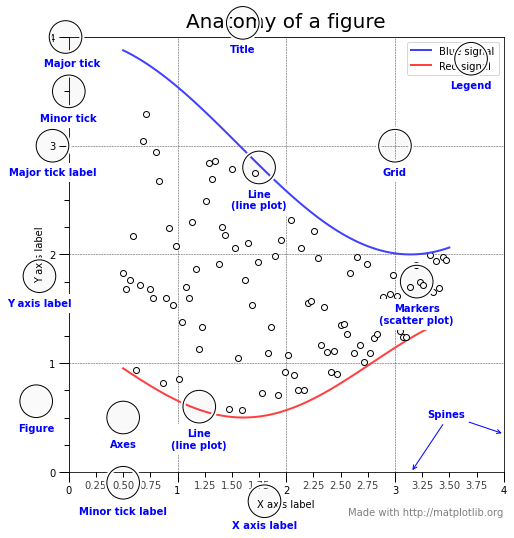

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

<br>

### 2.5.2 seaborn

- example : [http://seaborn.pydata.org/examples/index.html](http://seaborn.pydata.org/examples/index.html)
- user guide : [http://seaborn.pydata.org/tutorial.html](http://seaborn.pydata.org/tutorial.html)

<br>

### 2.5.3 한글 폰트 설정

- 리눅스 한글 폰트 설치 참고 : https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html

In [46]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

#font_family = get_font_family()

# 일반 폰트 설정
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

<AxesSubplot:title={'center':'한글폰트'}>

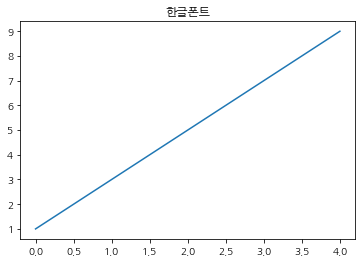

In [47]:
# 한글 폰트 확인
pd.Series([1, 3, 5, 7, 9]).plot(title='한글폰트')

<AxesSubplot:title={'center':'한글폰트'}>

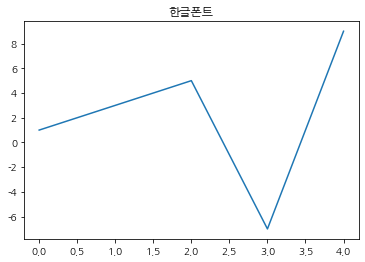

In [48]:
# 마이너스 폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

### 2.5.4 그래프 스타일 설정

In [49]:
# ggplot
plt.style.use('ggplot')

<AxesSubplot:title={'center':'한글폰트'}>

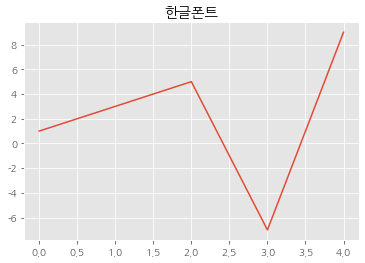

In [50]:
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

In [51]:
# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<AxesSubplot:title={'center':'한글폰트'}>

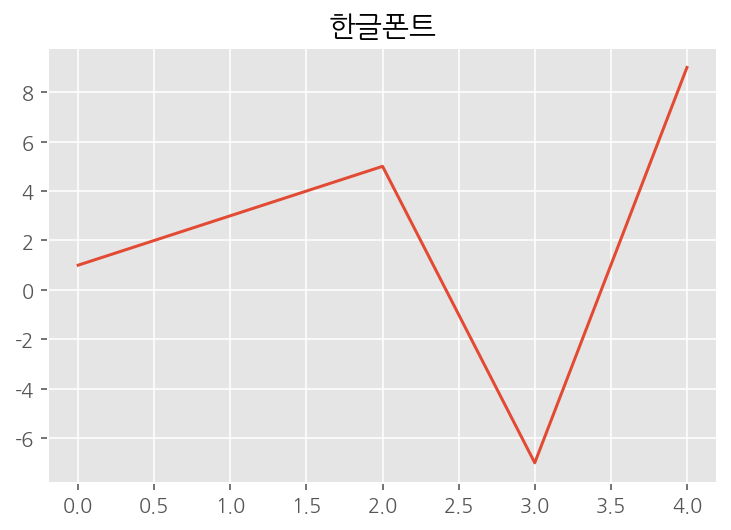

In [52]:
pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

## 2.6 한 개의 변수 빈도수 계산 및 시각화

- `value_counts()`
- `countplot()`

<br>

### 2.6.1 `Market`

In [53]:
# "Market" 컬럼 데이터 종류 확인
df['Market'].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [54]:
df['Market'].value_counts()

KOSDAQ    1471
KOSPI     1000
KONEX      143
Name: Market, dtype: int64

In [55]:
type(df['Market'].value_counts())

pandas.core.series.Series

<br>

Pandas Series 의 기본 그래프는 선 그래프이다.

<AxesSubplot:>

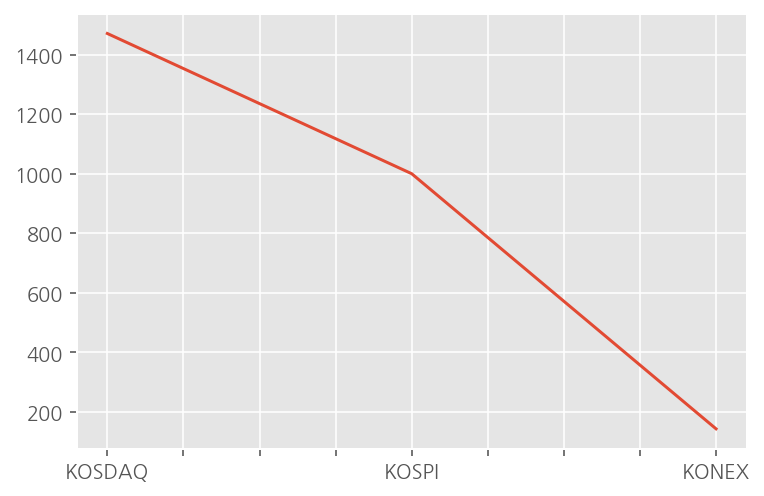

In [56]:
df['Market'].value_counts().plot()

<br>

`kind='bar'`를 넣어 막대 그래프를 그릴 수 있다.

<AxesSubplot:>

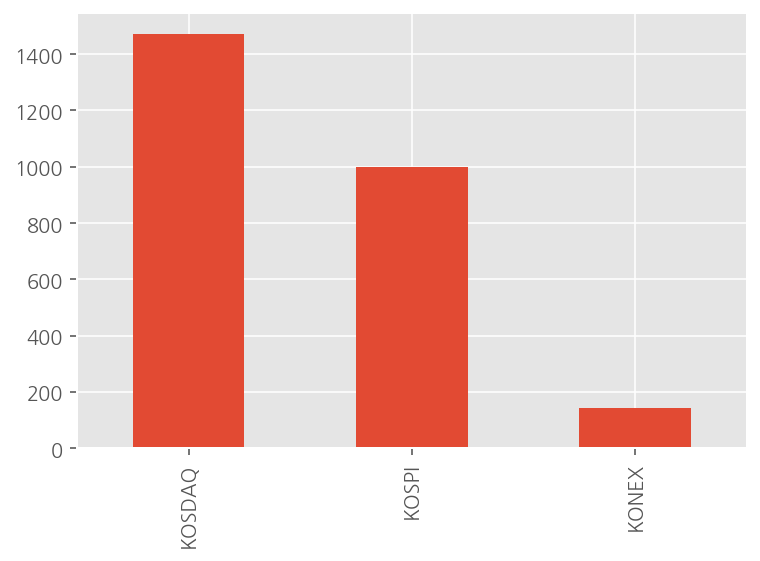

In [57]:
df['Market'].value_counts().plot(kind='bar')

<AxesSubplot:>

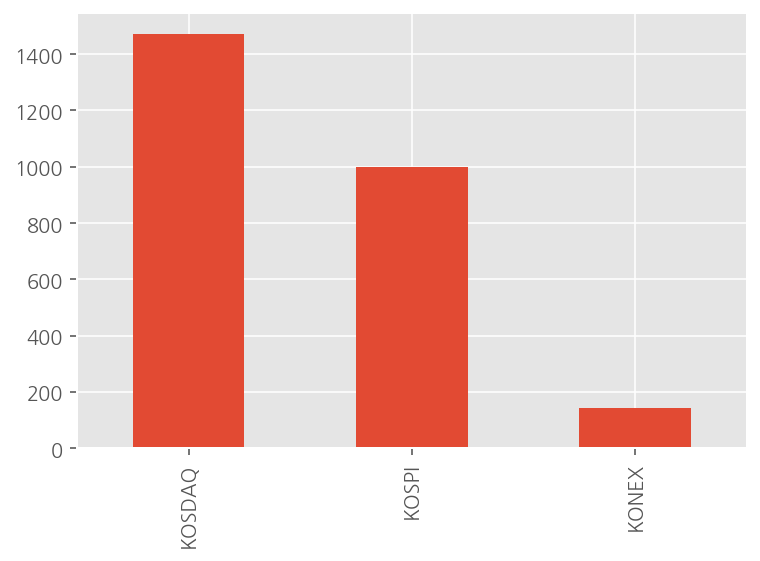

In [58]:
df['Market'].value_counts().plot.bar()

<br>

`kind='barh'`를 넣으면 수평(horizontal) 막대 그래프를 그릴 수 있다.

<AxesSubplot:>

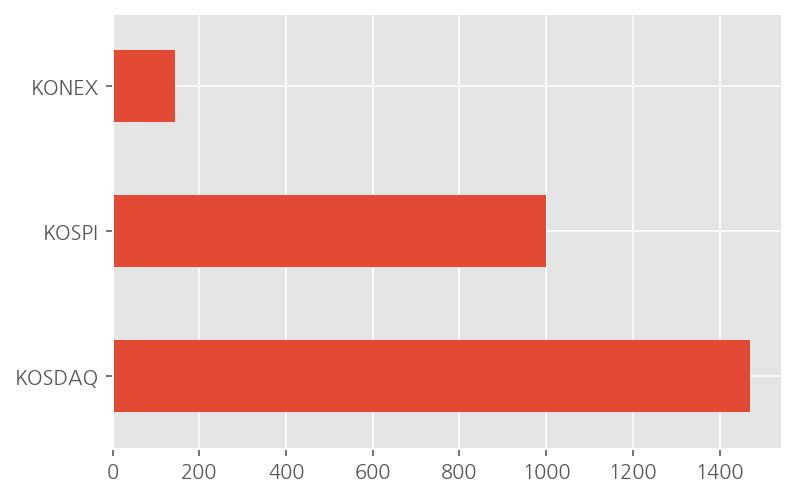

In [59]:
df['Market'].value_counts().plot(kind='barh')

<AxesSubplot:>

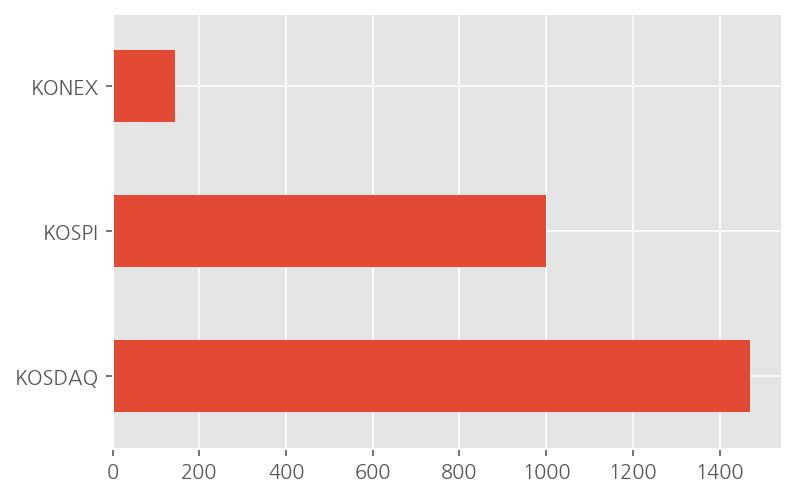

In [60]:
df['Market'].value_counts().plot.barh()

<br>

Seaborn countplot 활용 빈도수 시각화

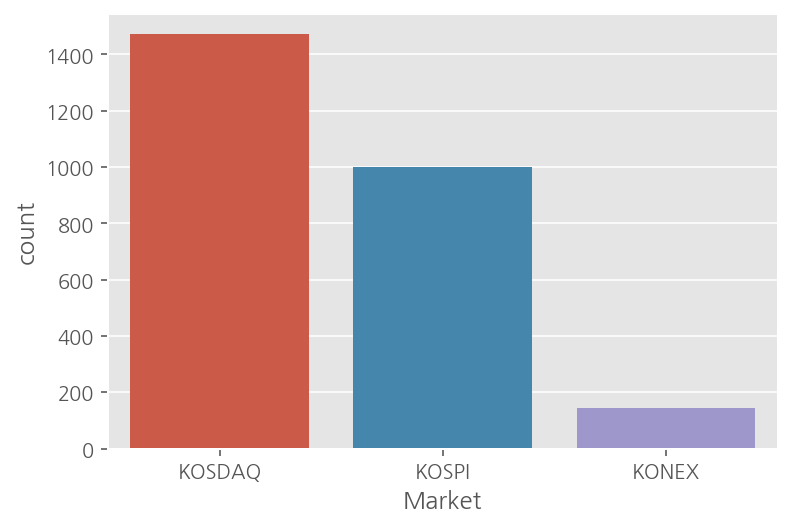

In [61]:
sns.countplot(data=df, x='Market')
plt.show()

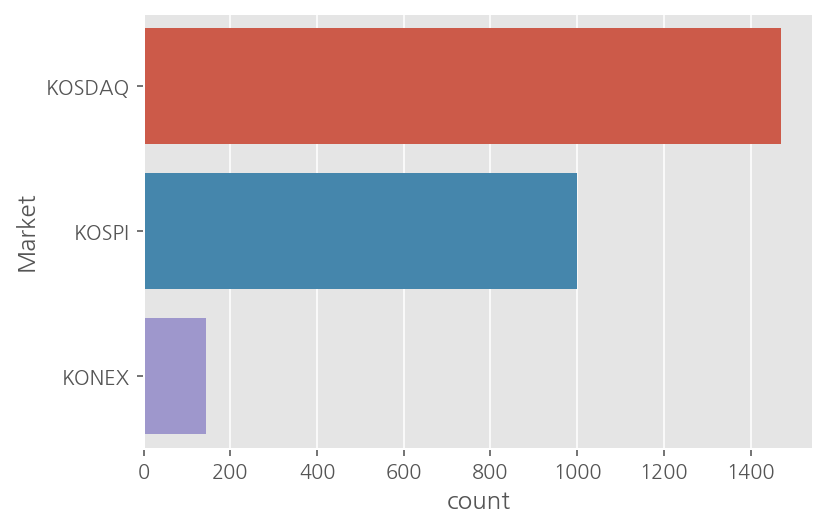

In [62]:
sns.countplot(data=df, y='Market')
plt.show()

<br>

### 2.6.2 `Sector`

섹터의 빈도수 확인

In [63]:
df['Sector'].value_counts()

특수 목적용 기계 제조업            141
소프트웨어 개발 및 공급업           135
전자부품 제조업                 121
자동차 신품 부품 제조업             97
의약품 제조업                   93
                        ... 
건축자재, 철물 및 난방장치 도매업        1
재 보험업                      1
섬유제품 염색, 정리 및 마무리 가공업      1
개인 및 가정용품 임대업              1
기타 전문 서비스업                 1
Name: Sector, Length: 158, dtype: int64

-> 158개의 유니크한 값들이 있다.

<br>

상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당

In [64]:
sector_count_top = df['Sector'].value_counts().head(30)

In [65]:
sector_count_top

특수 목적용 기계 제조업                            141
소프트웨어 개발 및 공급업                           135
전자부품 제조업                                 121
자동차 신품 부품 제조업                             97
의약품 제조업                                   93
기타 금융업                                    92
기타 화학제품 제조업                               90
통신 및 방송 장비 제조업                            72
금융 지원 서비스업                                71
1차 철강 제조업                                 57
반도체 제조업                                   57
자연과학 및 공학 연구개발업                           53
의료용 기기 제조업                                50
일반 목적용 기계 제조업                             44
기초 화학물질 제조업                               43
플라스틱제품 제조업                                43
기타 전문 도매업                                 42
기초 의약물질 및 생물학적 제제 제조업                     38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   35
영화, 비디오물, 방송프로그램 제작 및 배급업                 34
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
기타 식품 제조업                                 33
의료용품 및 기타 

<br>

상위 30개 섹터 빈도수 시각화

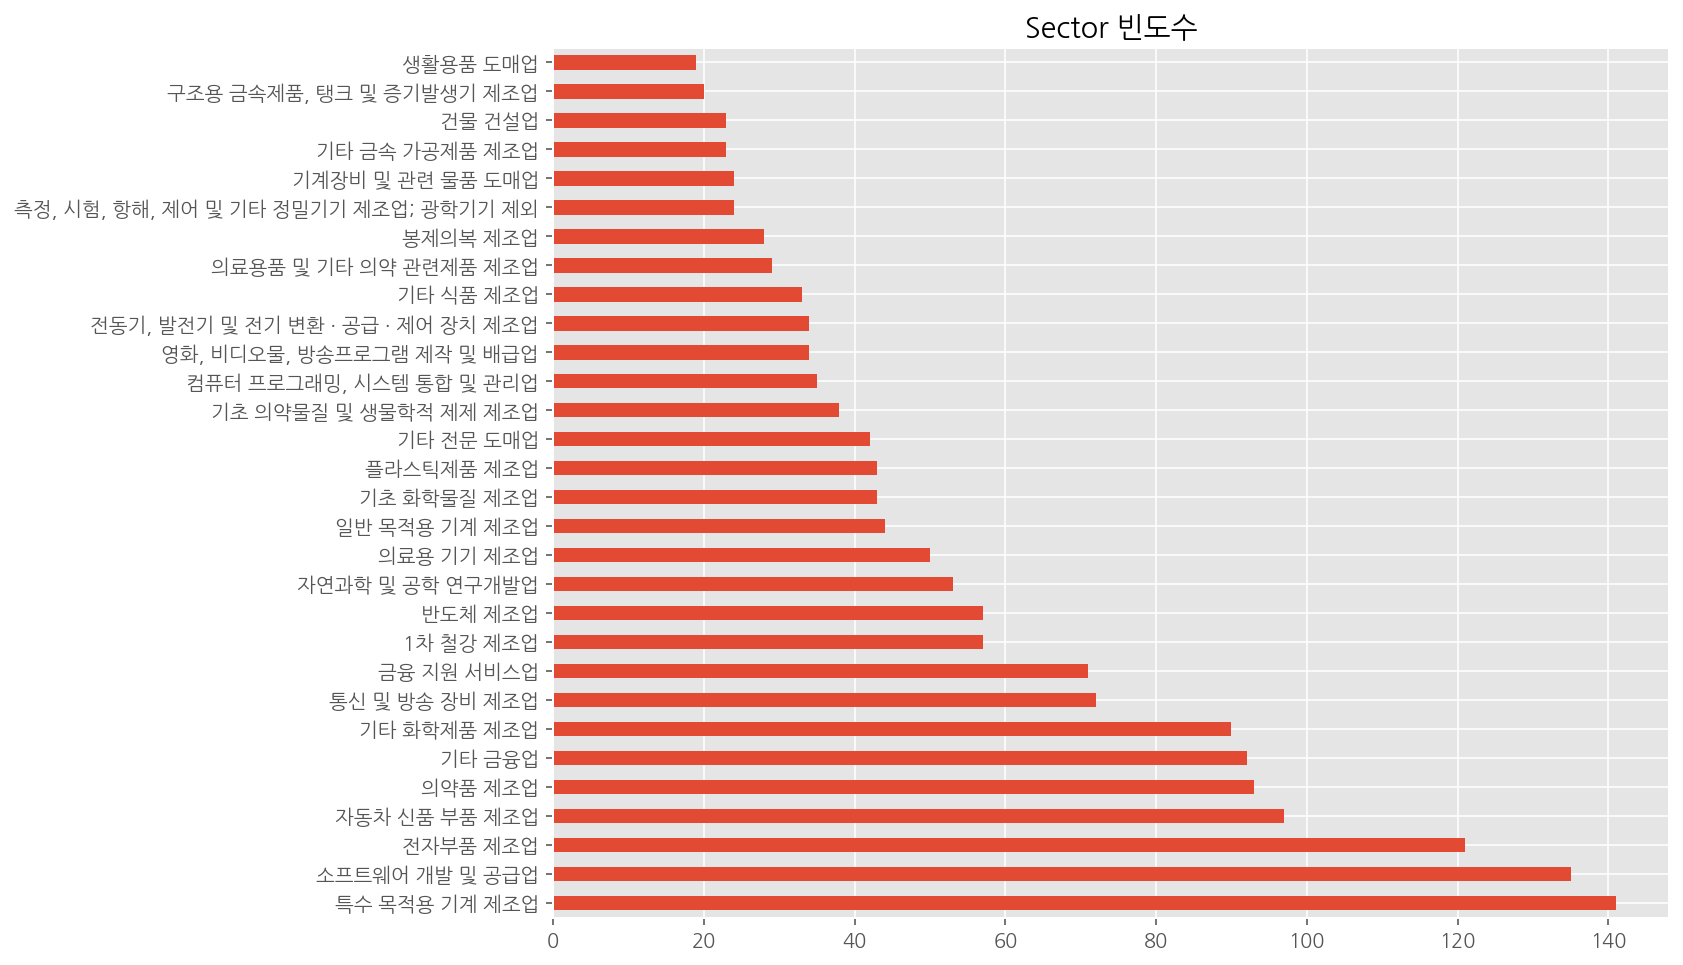

In [66]:
sector_count_top.plot.barh(figsize=(10, 8), title='Sector 빈도수')
plt.show()

<br>

`seaborn`의 `countplot()` 이용하여 시각화

In [67]:
df[df['Sector'].isin(sector_count_top.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
2603,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
2604,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시,2002.0
2605,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
2606,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


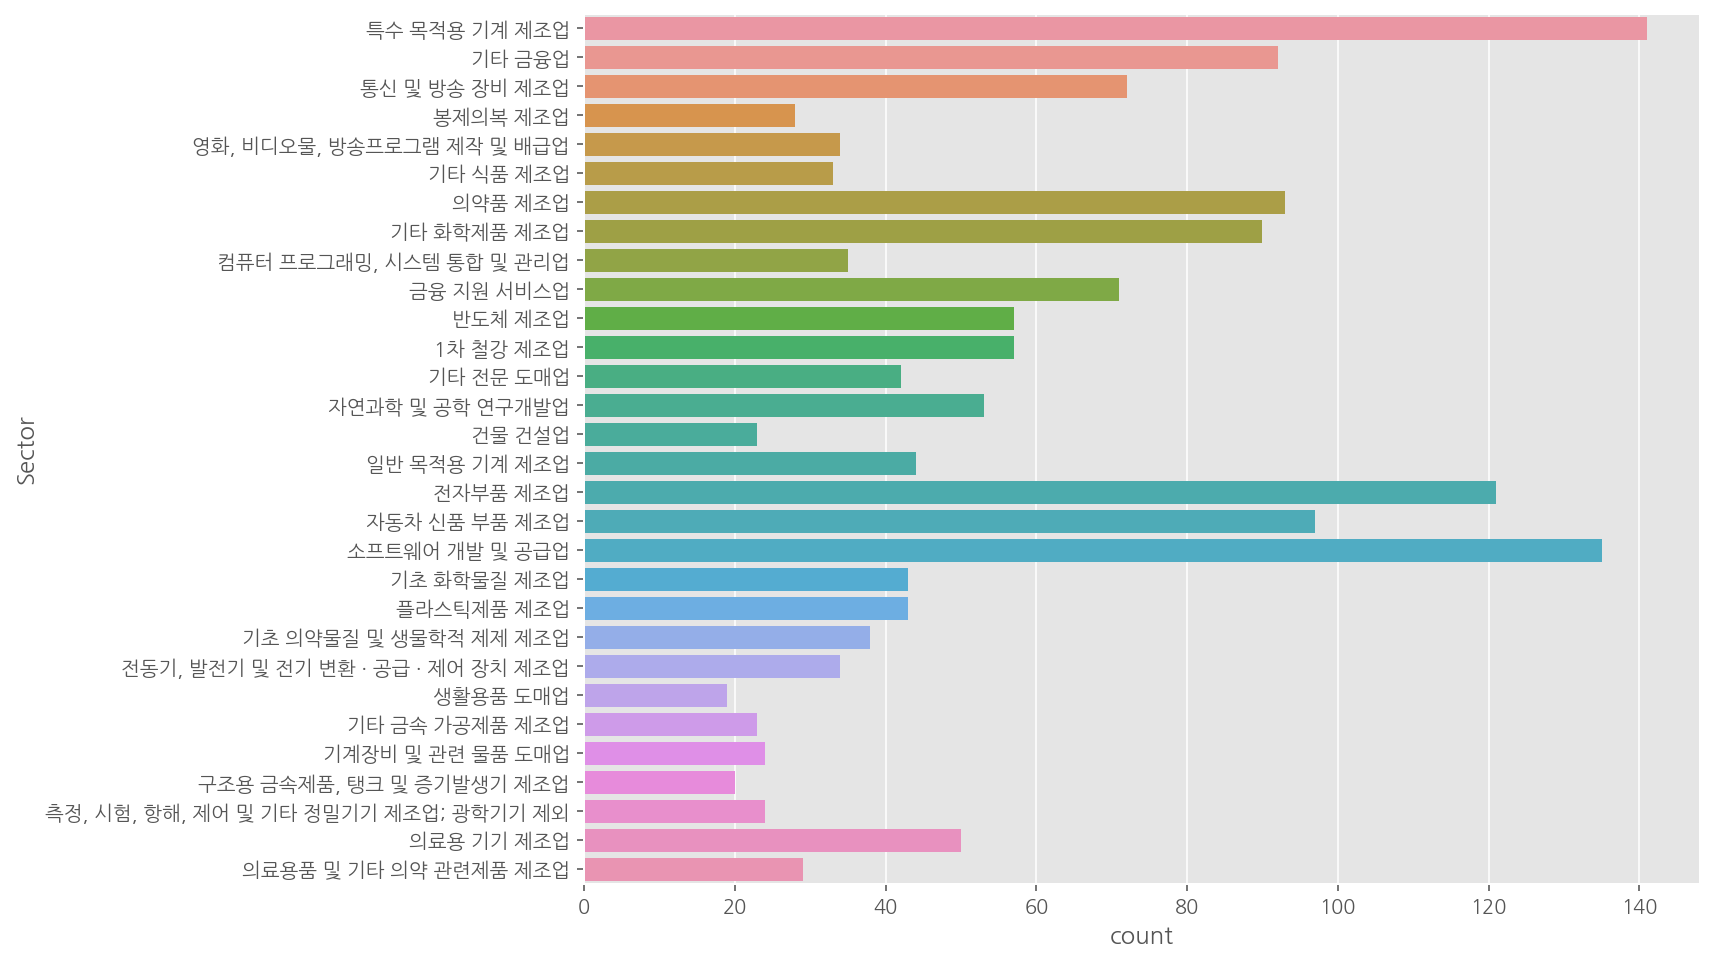

In [68]:
plt.figure(figsize=(10,8))
sns.countplot(data=df[df['Sector'].isin(sector_count_top.index)], y='Sector')
plt.show()

<br>

빈도수가 가장 높은 섹터에 해당하는 종목 찾기

In [69]:
df[df['Sector'] == '특수 목적용 기계 제조업']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
35,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도,2004.0
53,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도,2006.0
60,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
2575,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시,1988.0
2576,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시,1999.0
2592,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도,2006.0
2606,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


<br>

`sns.countplot()`의 정렬 기능 사용

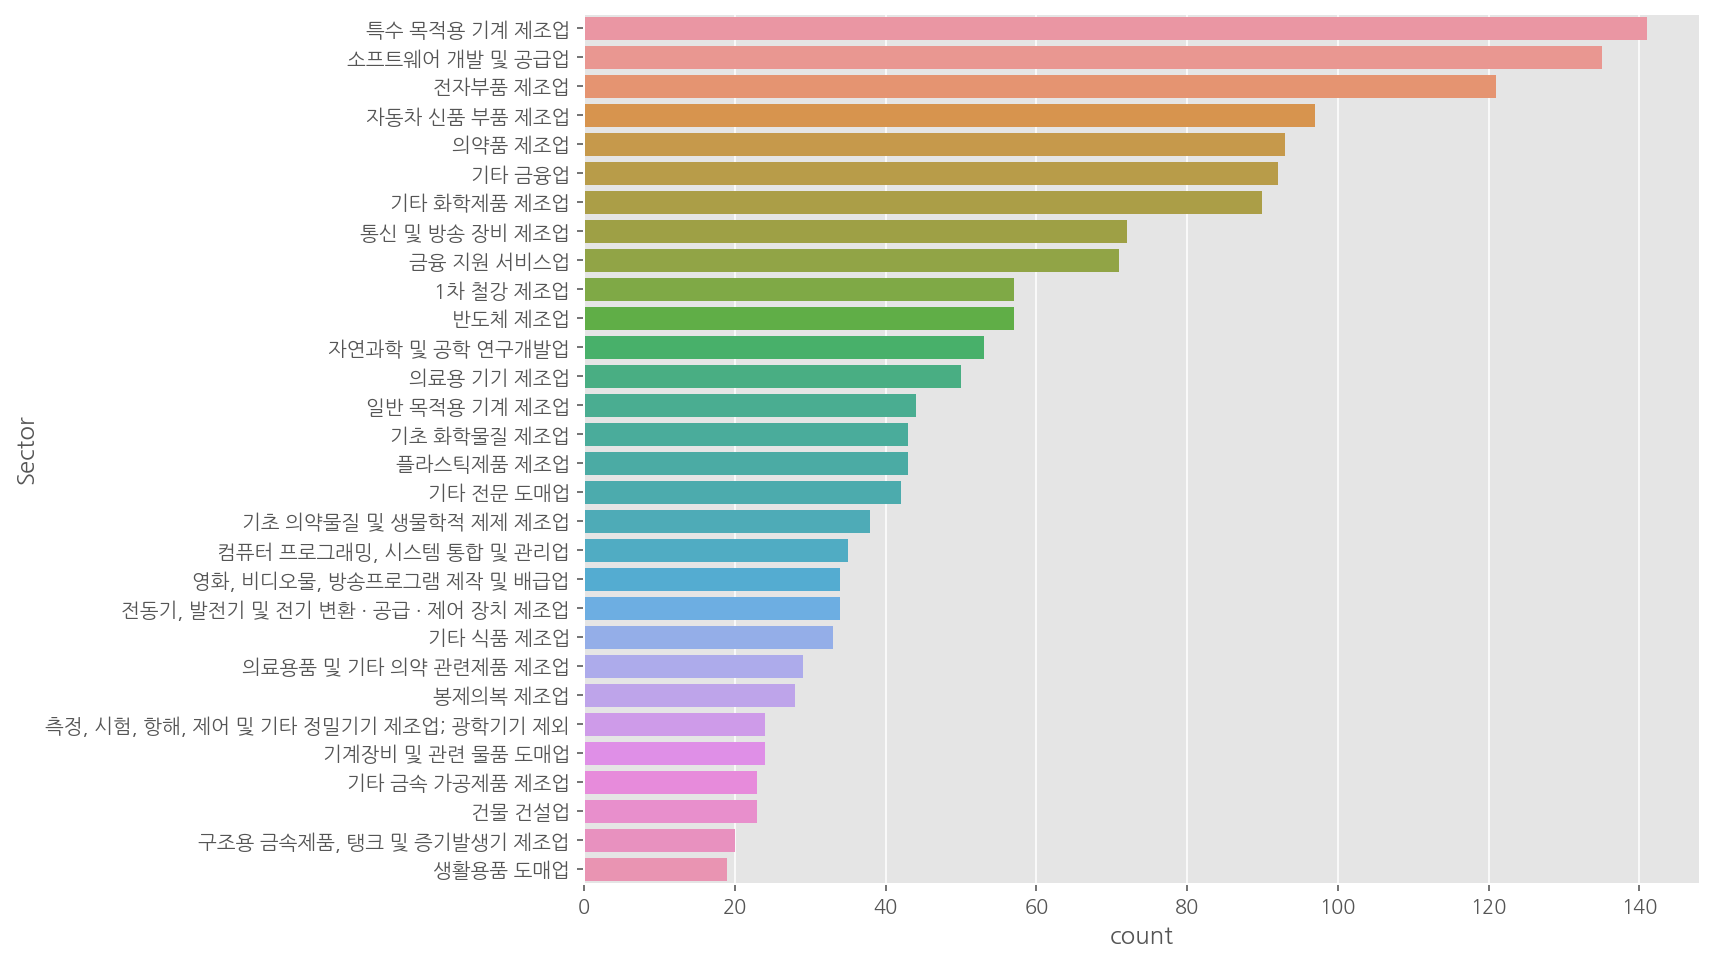

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(
    data=df[df['Sector'].isin(sector_count_top.index)],
    y='Sector',
    order=sector_count_top.index
)
plt.show()

<br>

color palette 설정

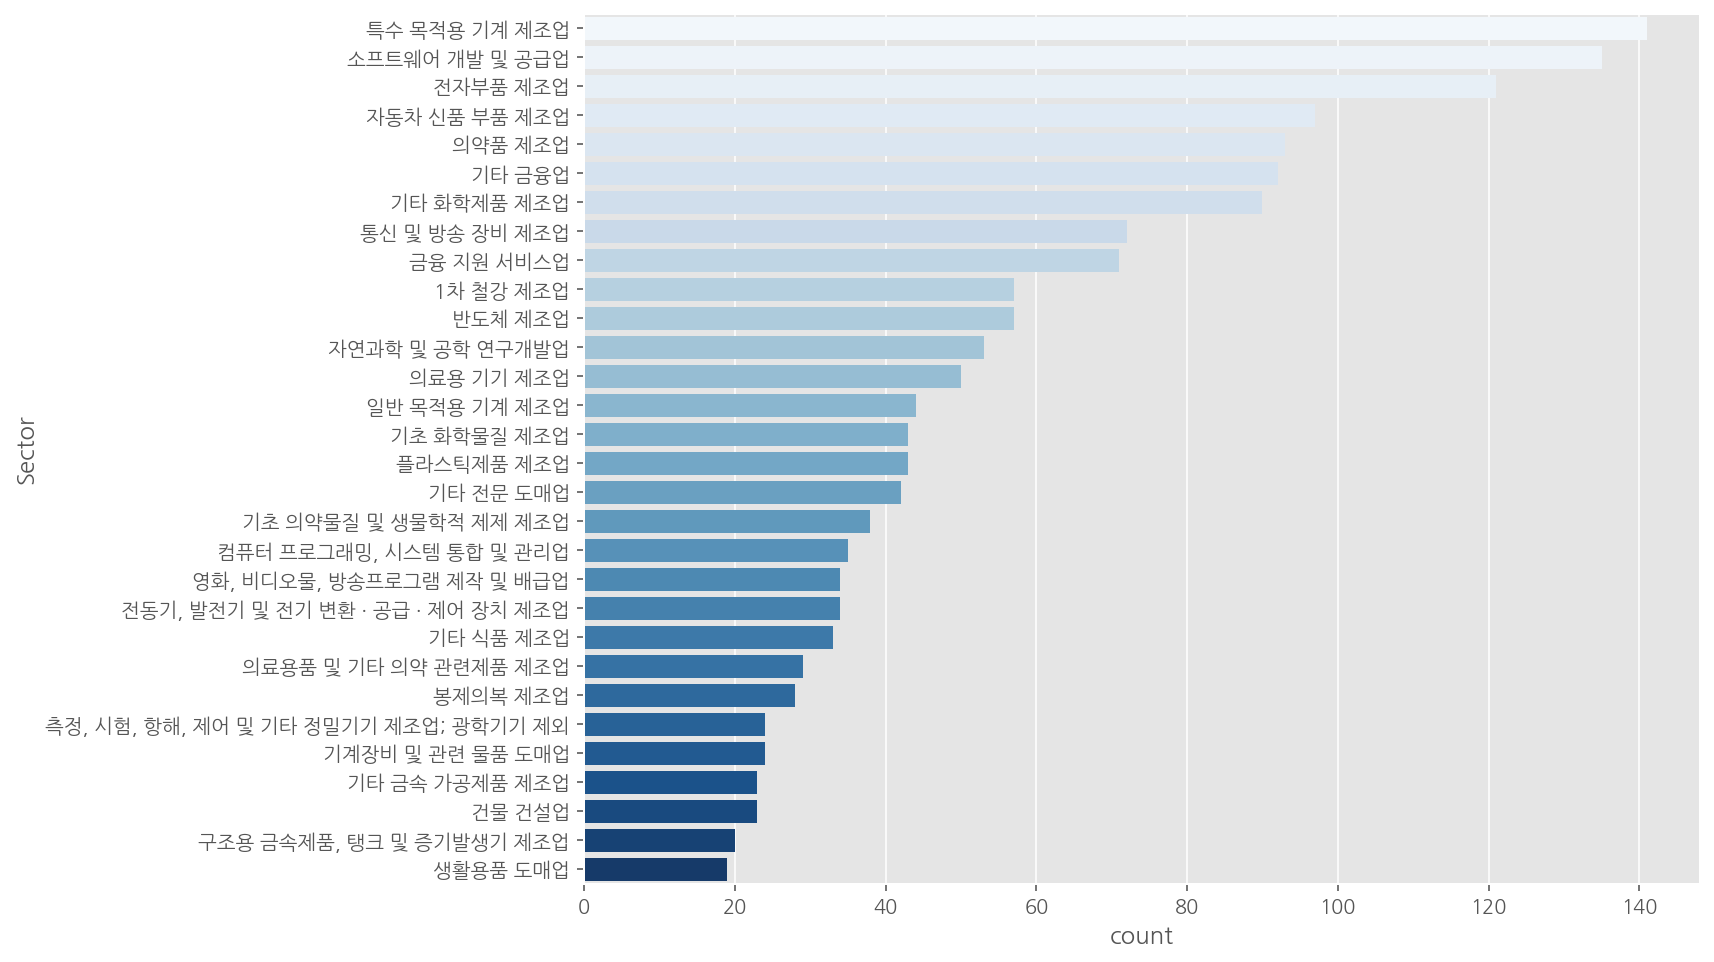

In [71]:
# palette='Blues' : 빈도수가 적은 것을 진하게

plt.figure(figsize=(10,8))
sns.countplot(
    data=df[df['Sector'].isin(sector_count_top.index)],
    y='Sector',
    order=sector_count_top.index,
    palette='Blues'
)
plt.show()

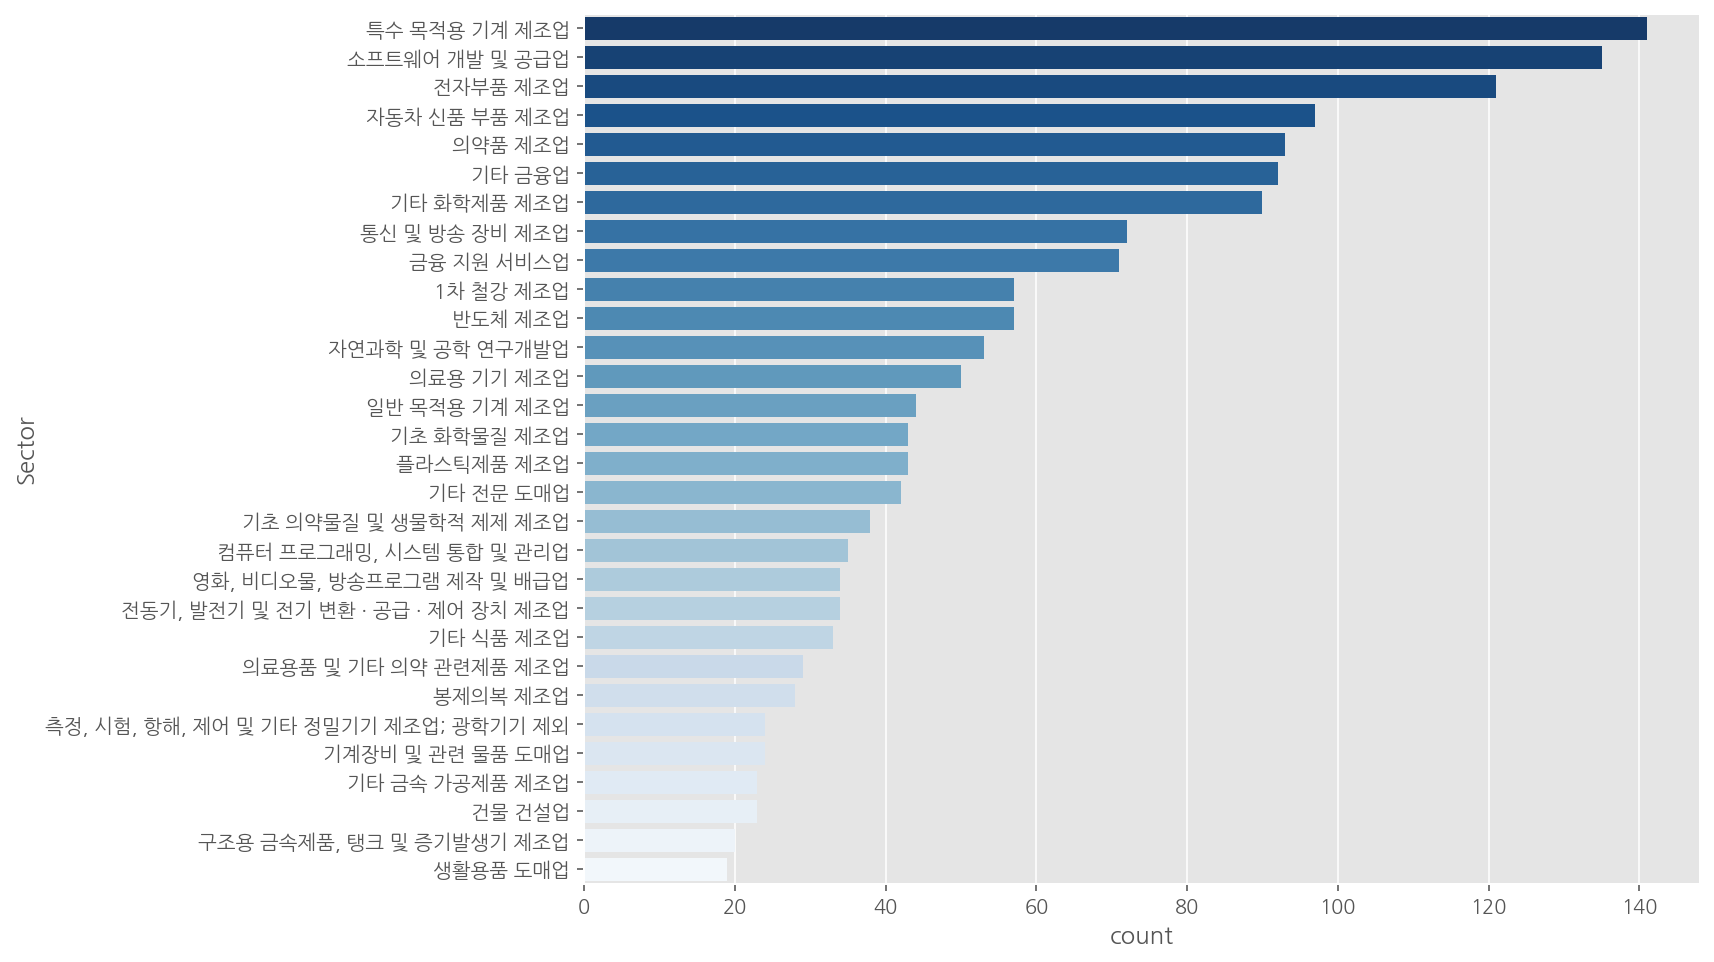

In [72]:
# palette='Blues_r' : 빈도수가 많은 것을 진하게

plt.figure(figsize=(10,8))
sns.countplot(
    data=df[df['Sector'].isin(sector_count_top.index)],
    y='Sector',
    order=sector_count_top.index,
    palette='Blues_r'
)
plt.show()

<br>

### 2.6.3 Industry

In [73]:
df['Industry'].value_counts()

기업인수합병                    37
지주회사                      19
지주사업                       9
기업 인수 및 합병                 7
모바일게임                      7
                          ..
전도성 고분자 코팅 대전방지 필름         1
살균제, 살충제, 제초제 등            1
의료기기 및 실험기기                1
MiPlatform, X Platform     1
제조업용로봇및서비스로봇               1
Name: Industry, Length: 2240, dtype: int64

<AxesSubplot:>

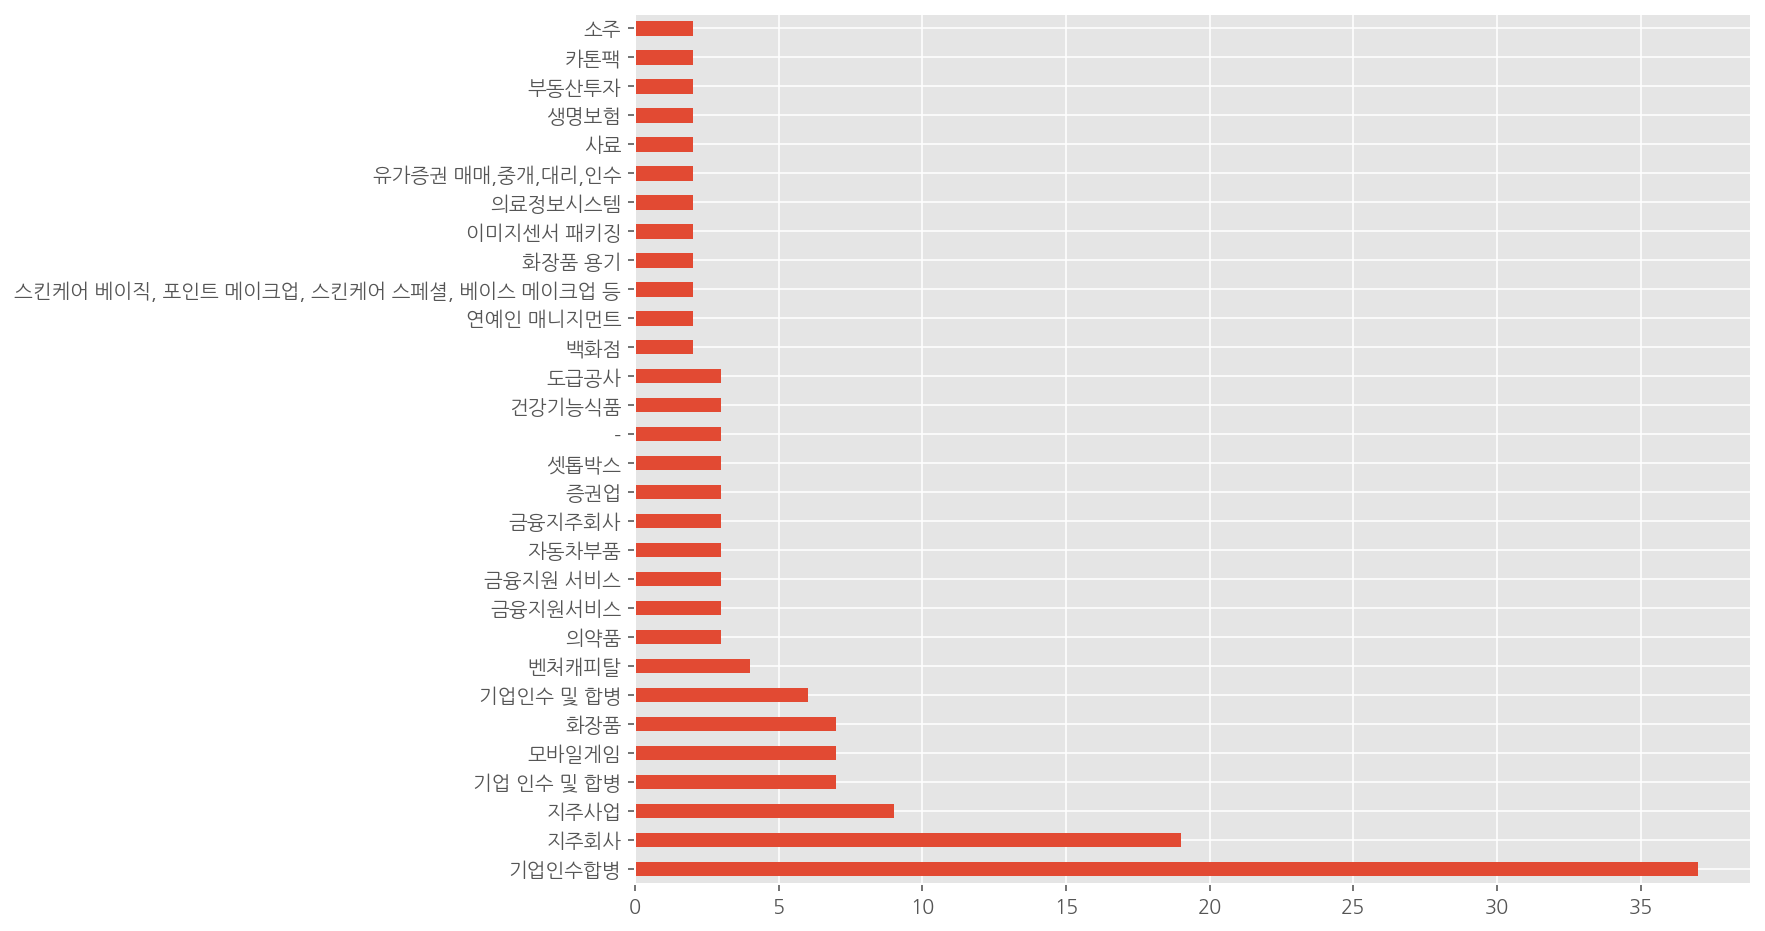

In [74]:
df['Industry'].value_counts().head(30).plot.barh(figsize=(10,8))

<AxesSubplot:>

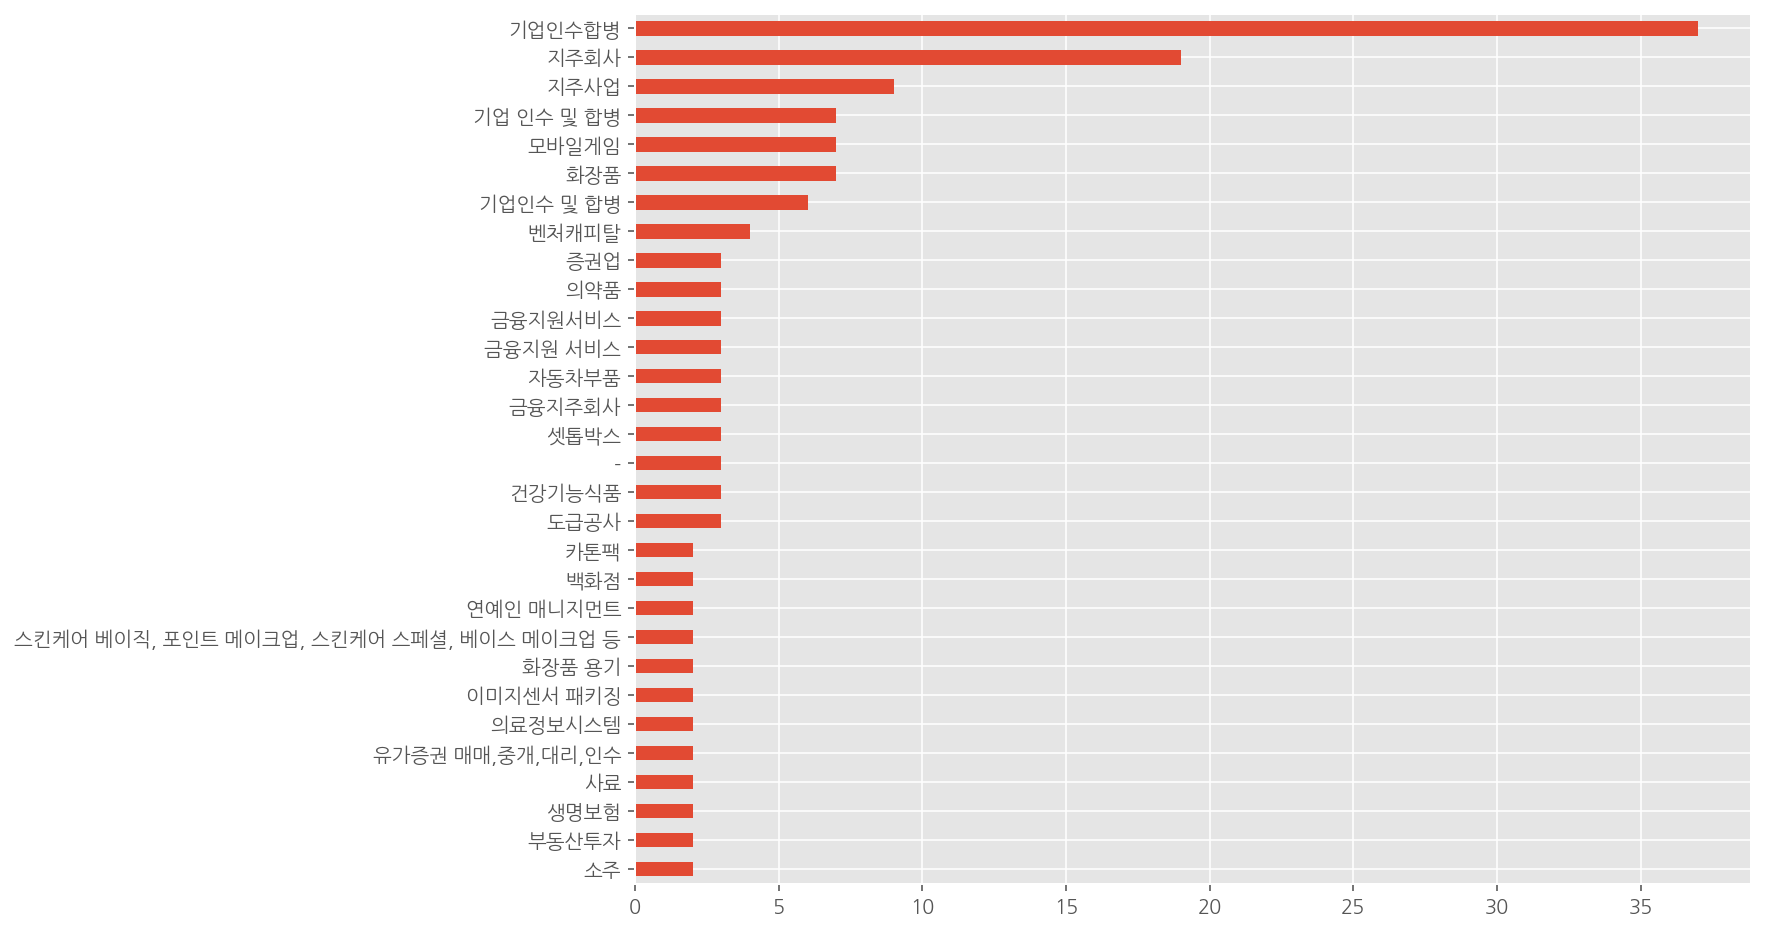

In [75]:
# 정렬(많은 게 위로 오게)
df['Industry'].value_counts().head(30).sort_values().plot.barh(figsize=(10,8))

<br>

### 2.6.4 Region

In [76]:
df['Region'].value_counts()

서울특별시      969
경기도        674
충청남도        93
경상남도        89
인천광역시       86
충청북도        83
부산광역시       76
경상북도        63
대구광역시       56
대전광역시       53
전라북도        28
강원도         27
울산광역시       26
광주광역시       24
전라남도        23
제주특별자치도     10
홍콩           9
세종특별자치시      9
미국           5
케이맨 제도       5
일본           3
Name: Region, dtype: int64

<AxesSubplot:>

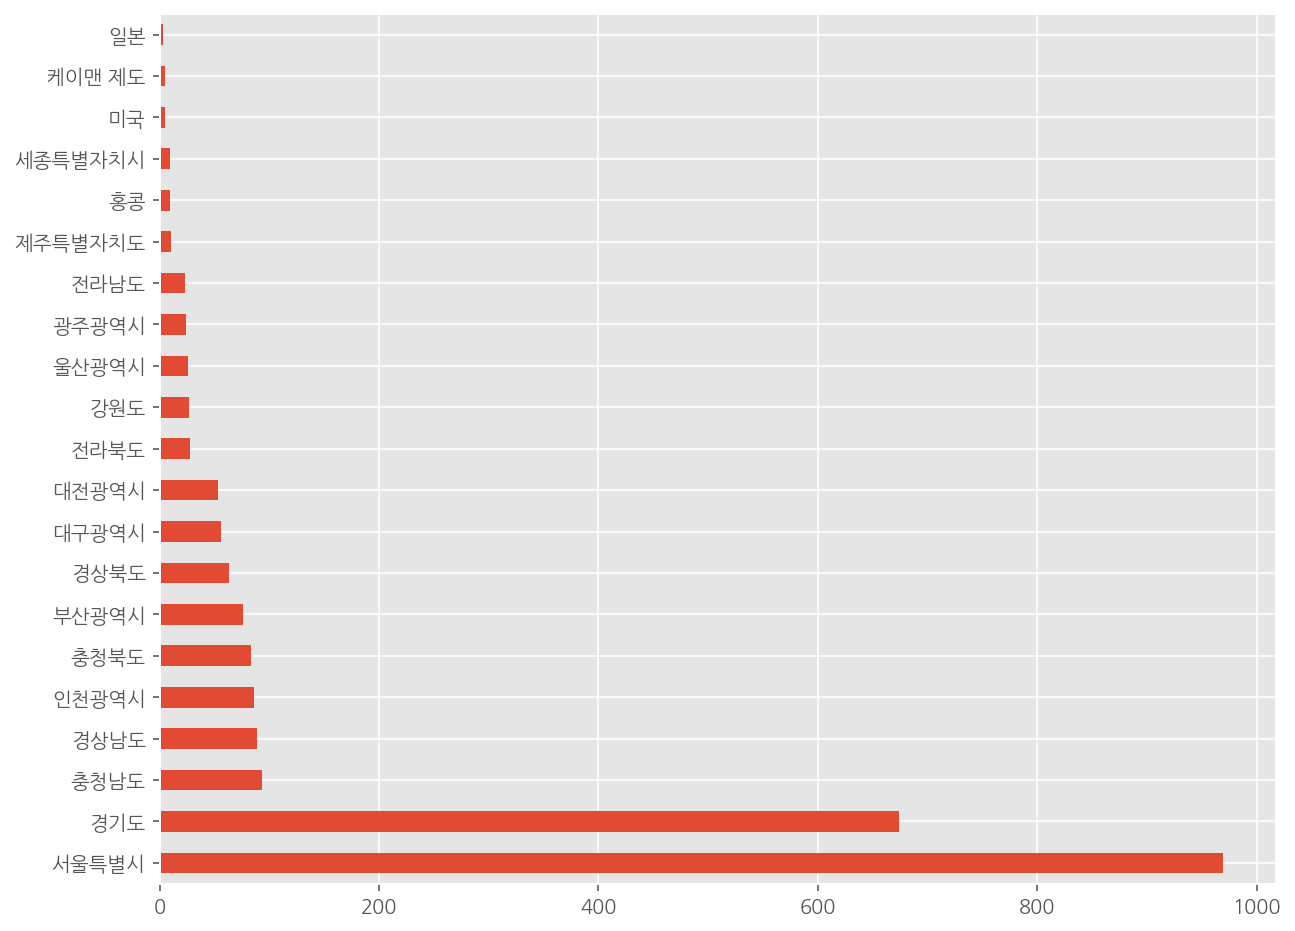

In [77]:
df['Region'].value_counts().plot.barh(figsize=(10,8))

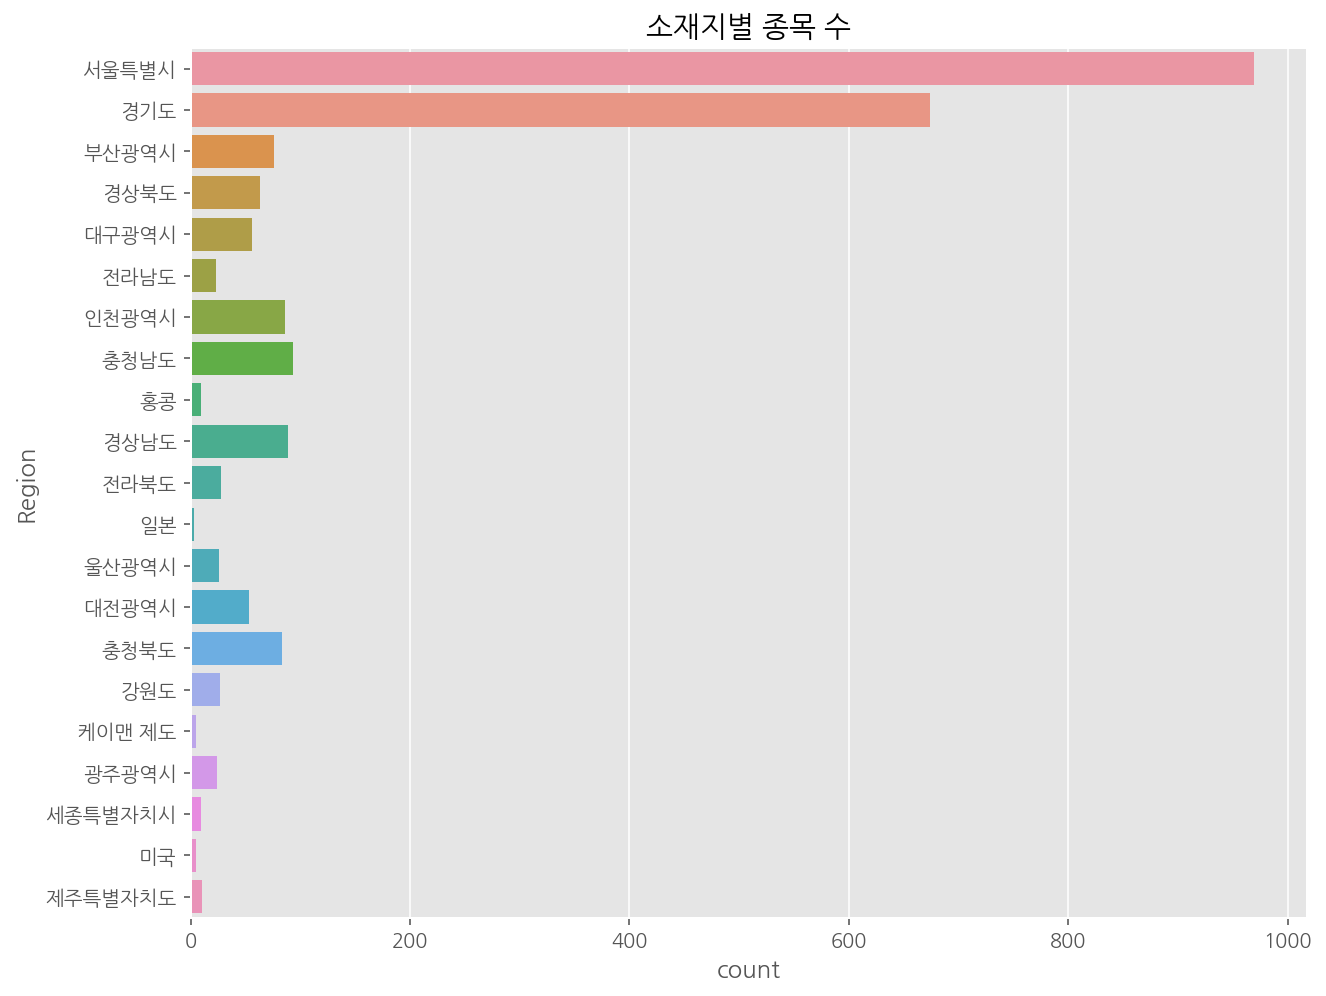

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(
    data=df, 
    y='Region'
    #palette='Greens_r'
).set_title('소재지별 종목 수')
plt.show()

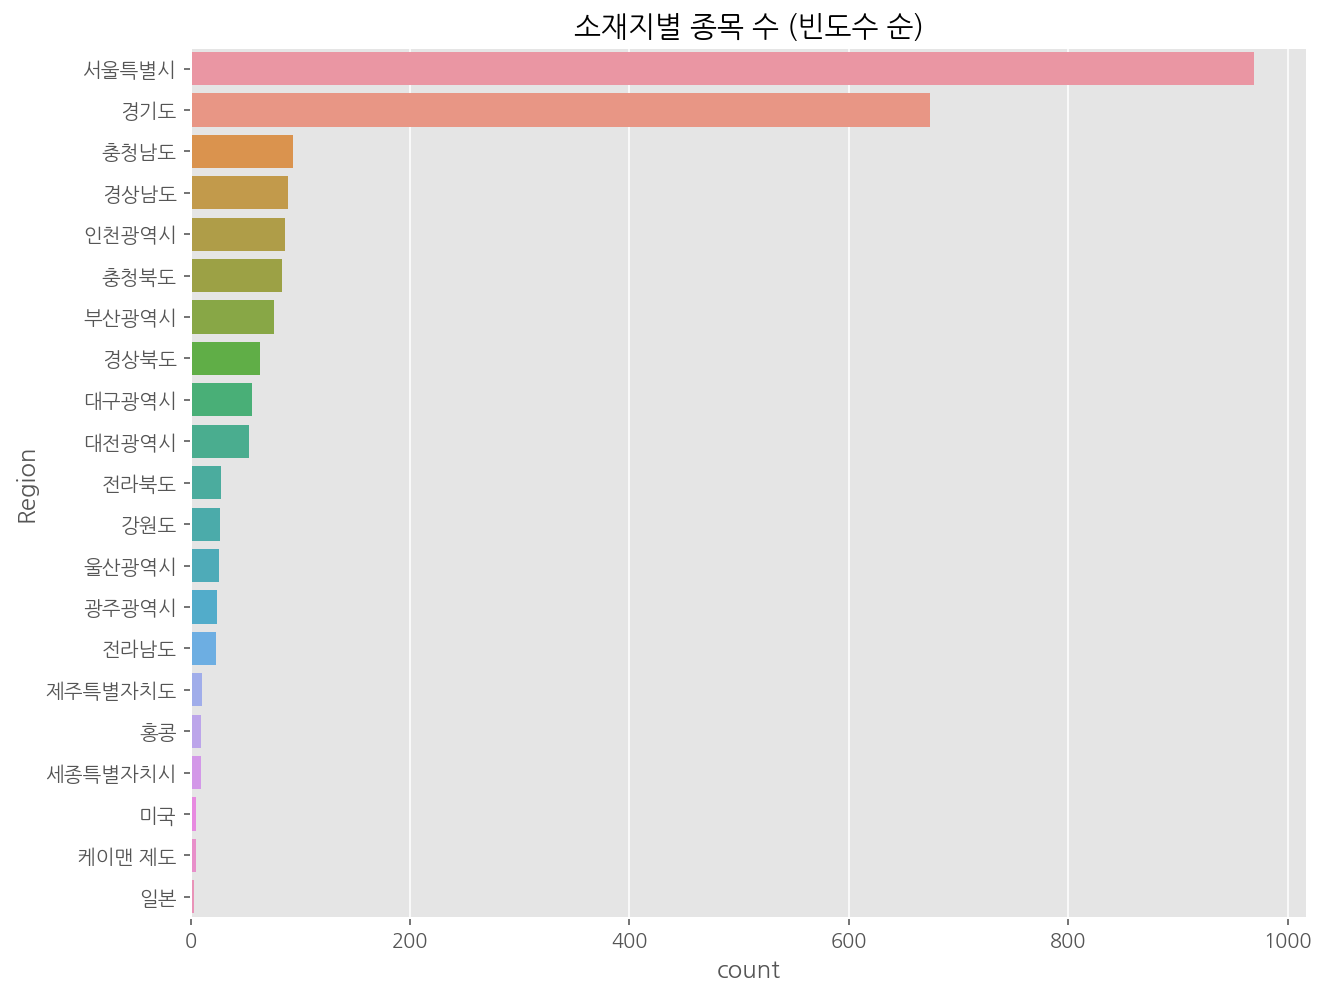

In [79]:
# 정렬 수행 (빈도수)

plt.figure(figsize=(10,8))
sns.countplot(
    data=df, 
    y='Region', 
    order=df['Region'].value_counts().index
    #palette='Greens_r'
).set_title('소재지별 종목 수 (빈도수 순)')
plt.show()

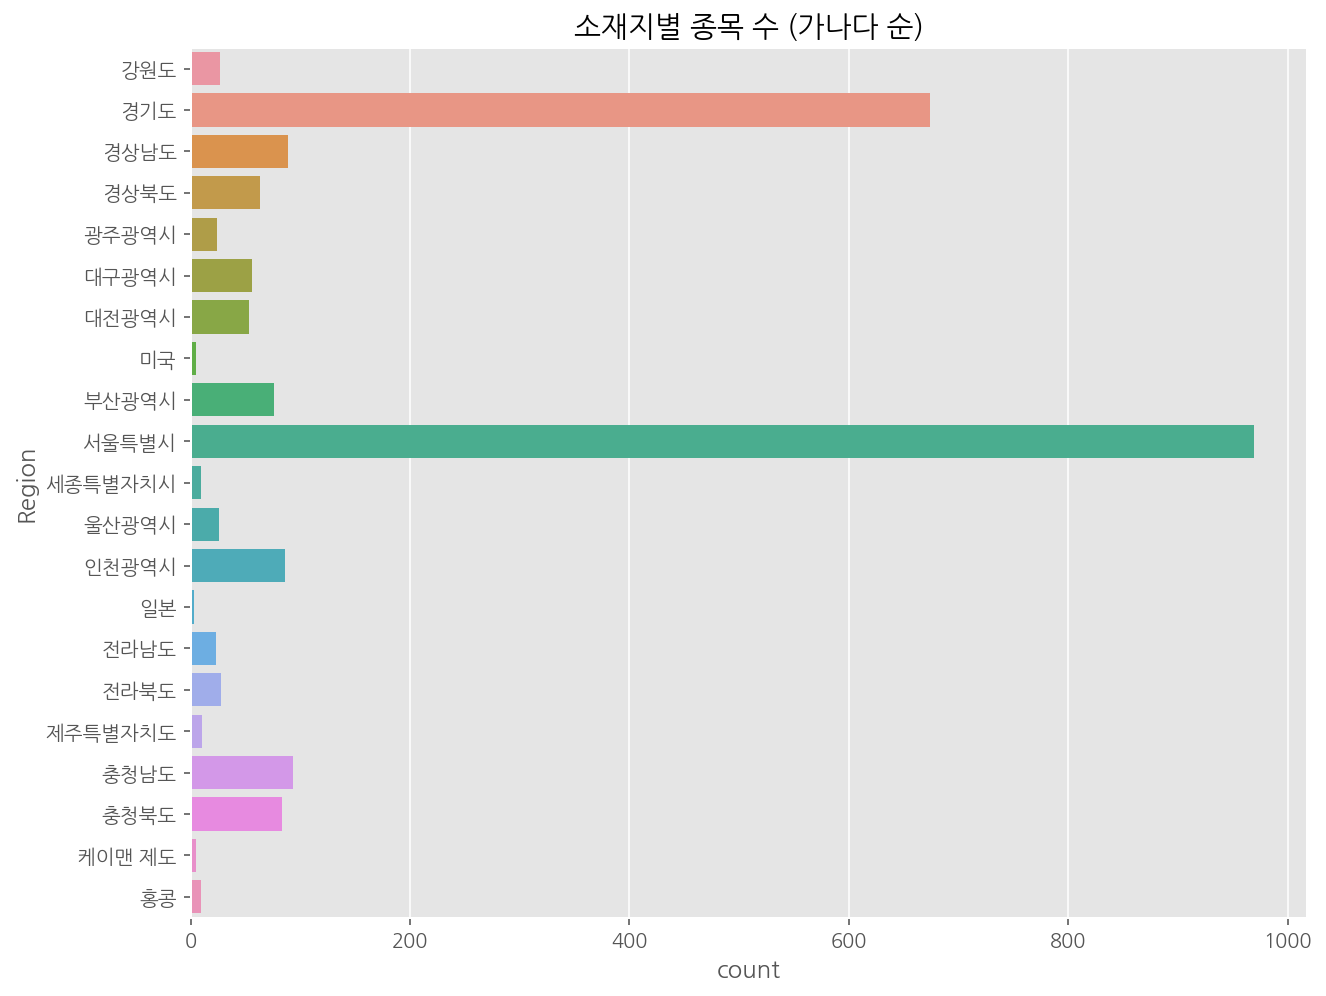

In [80]:
# 정렬 수행 (가나다 순)
plt.figure(figsize=(10,8))
sns.countplot(
    data=df.sort_values(by='Region'),
    y='Region',
).set_title('소재지별 종목 수 (가나다 순)')
plt.show()

<br>

## 2.7 두 개의 변수 빈도수 계산 및 시각화

- `crosstab()`
- `lineplot()` : 연속된 데이터 (숫자, 기간)
- `barplot()` : 비연속 데이터 (범주형)
- `hist()` : 연속된 수치 데이터의 범주화

<br>

### 2.7.1 지역(Region)별 상장 시장(Market) 종목 빈도수 구하기

In [82]:
pd.crosstab(df['Market'], df['Region'])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,37,0,7,6,1,7,0,1,54,...,0,4,0,3,1,1,4,9,0,0
KOSDAQ,16,492,49,37,9,34,38,5,38,508,...,10,57,3,13,16,2,63,60,4,9
KOSPI,4,145,40,19,9,21,8,0,37,407,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:xlabel='Market', ylabel='count'>

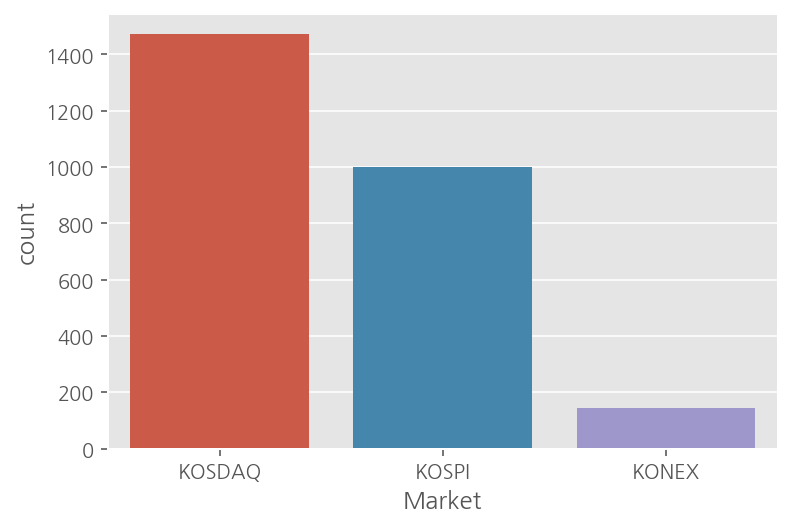

In [83]:
sns.countplot(data=df, x='Market')

<AxesSubplot:xlabel='count', ylabel='Region'>

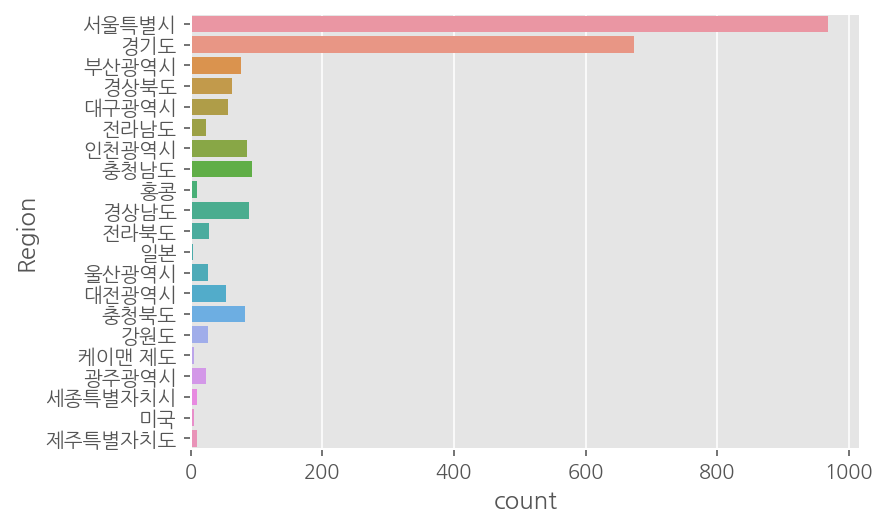

In [85]:
sns.countplot(data=df, y='Region')

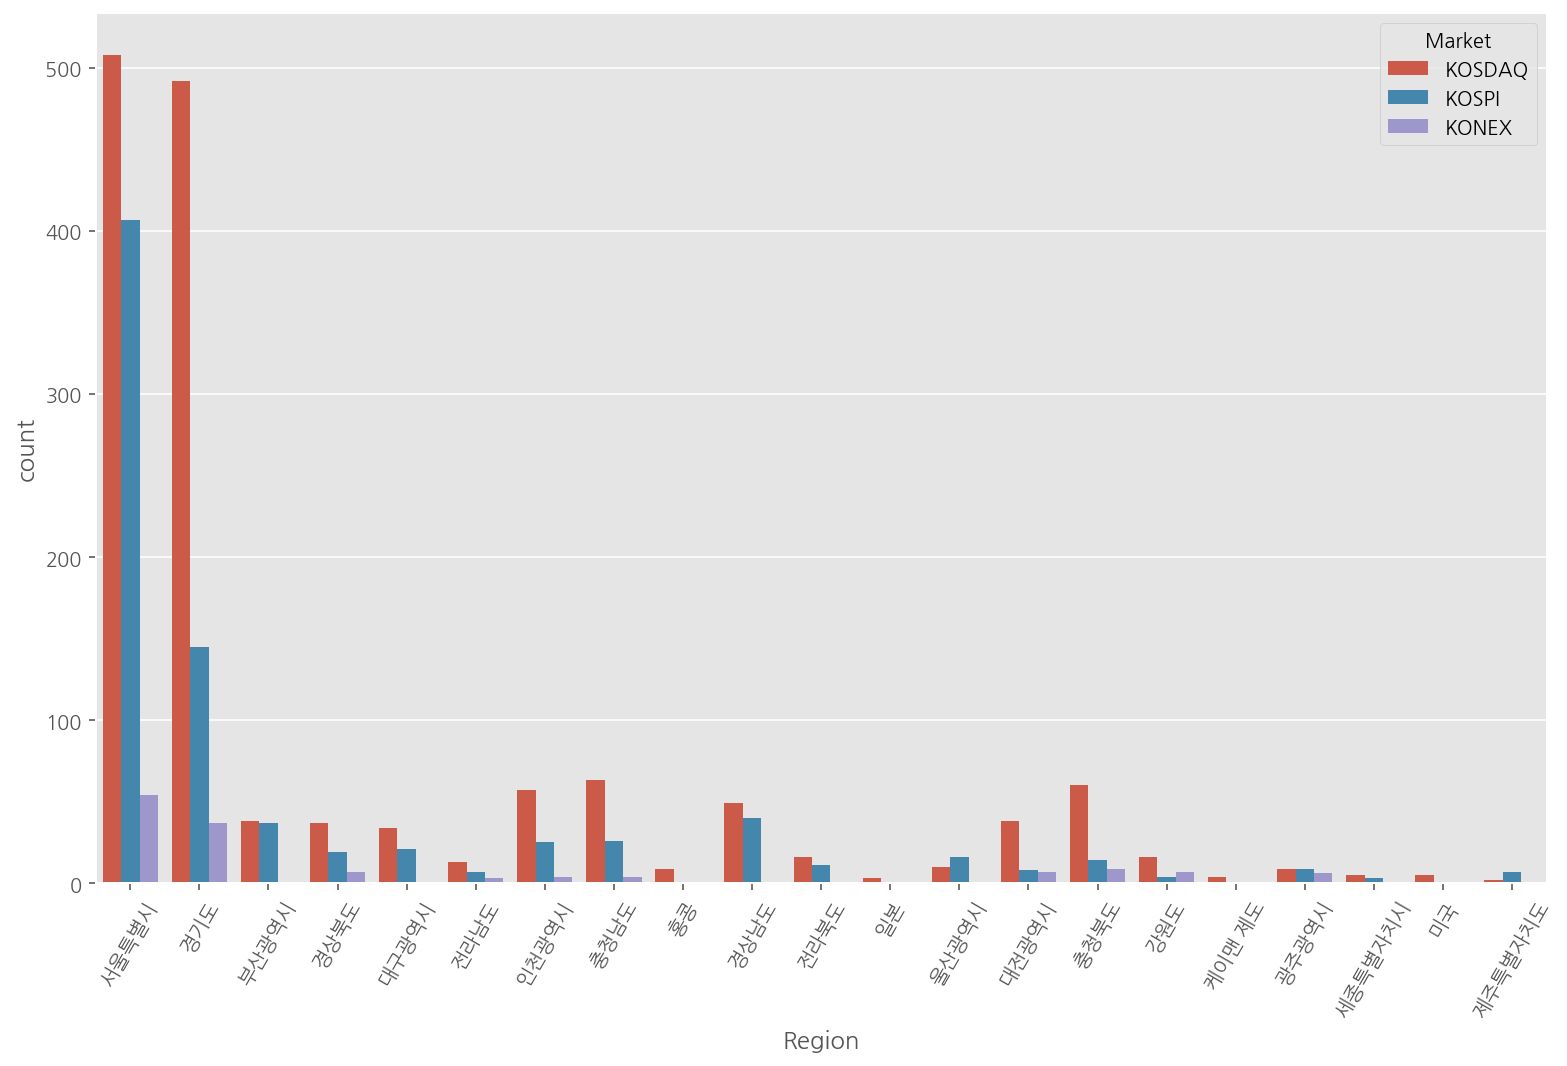

In [95]:
# hue 속성에 Market을 지정
plt.figure(figsize=(13, 8))
sns.countplot(data=df, x='Region', hue='Market')
plt.xticks(rotation=60)
plt.show()

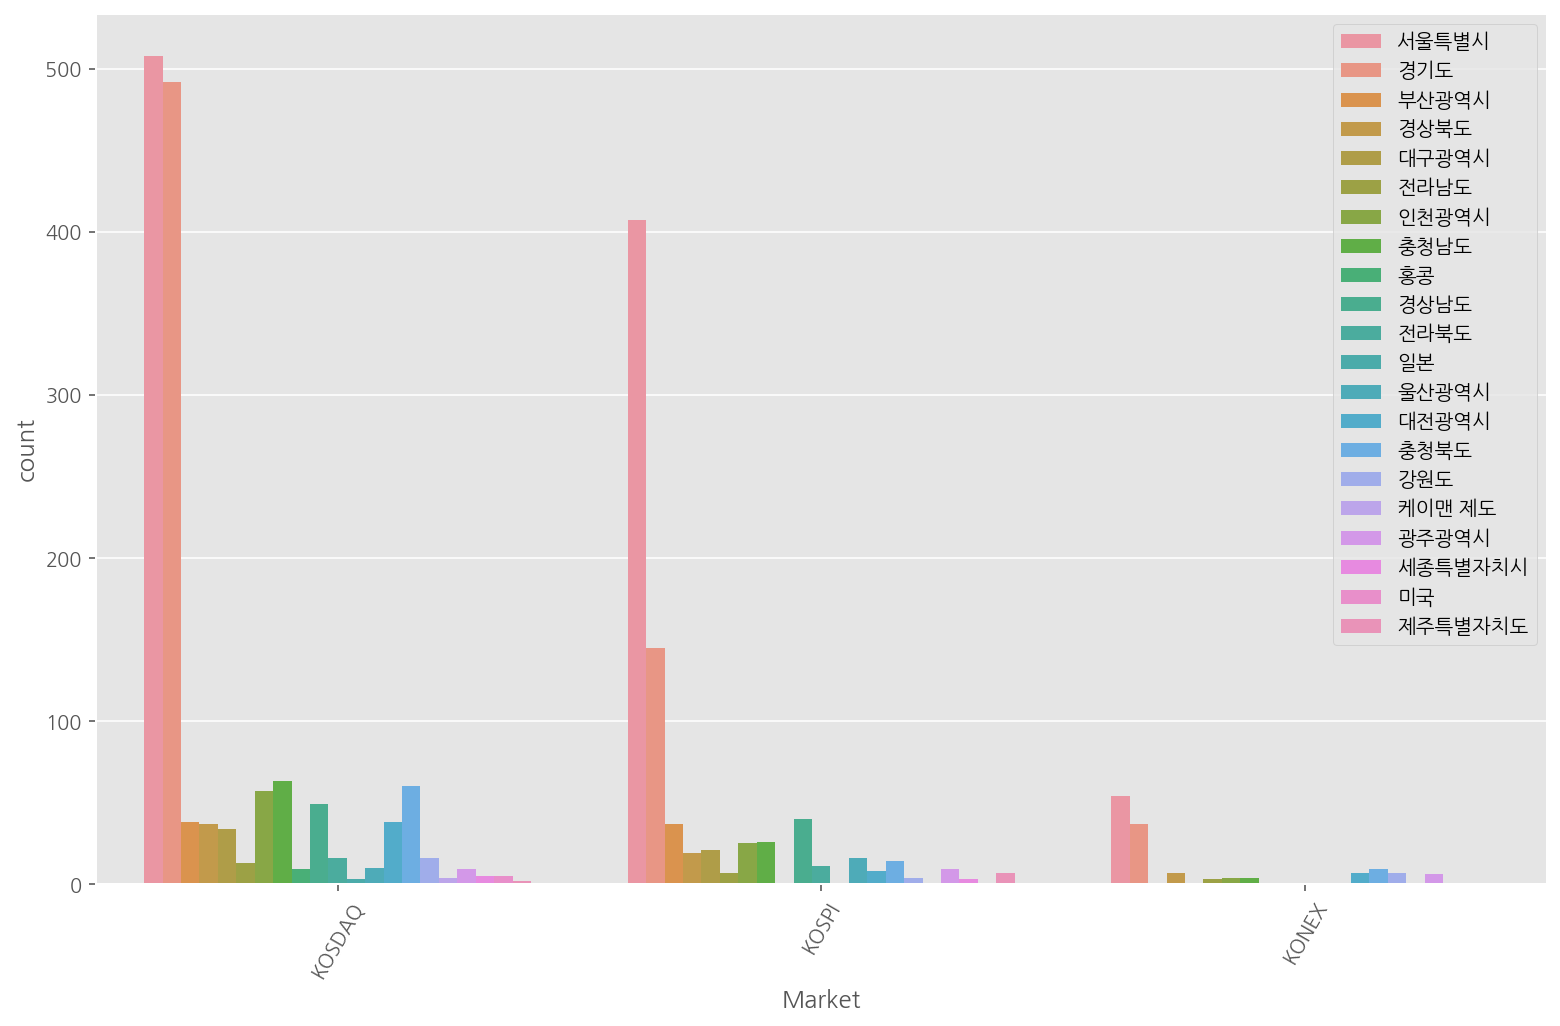

In [97]:
# hue 속성에 Region 지정
plt.figure(figsize=(13, 8))
sns.countplot(data=df, x='Market', hue='Region')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.show()

<br>

`hue` 속성에는 빈도수가 적은 컬럼을 지정하는 것을 권장한다.

<br>

### 2.7.2 연도별 상장 종목 빈도수 분석

- 시장 : `Market`
- 상장연도 : `ListingYear`

In [98]:
pd.crosstab(df['Market'], df['ListingYear'])

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


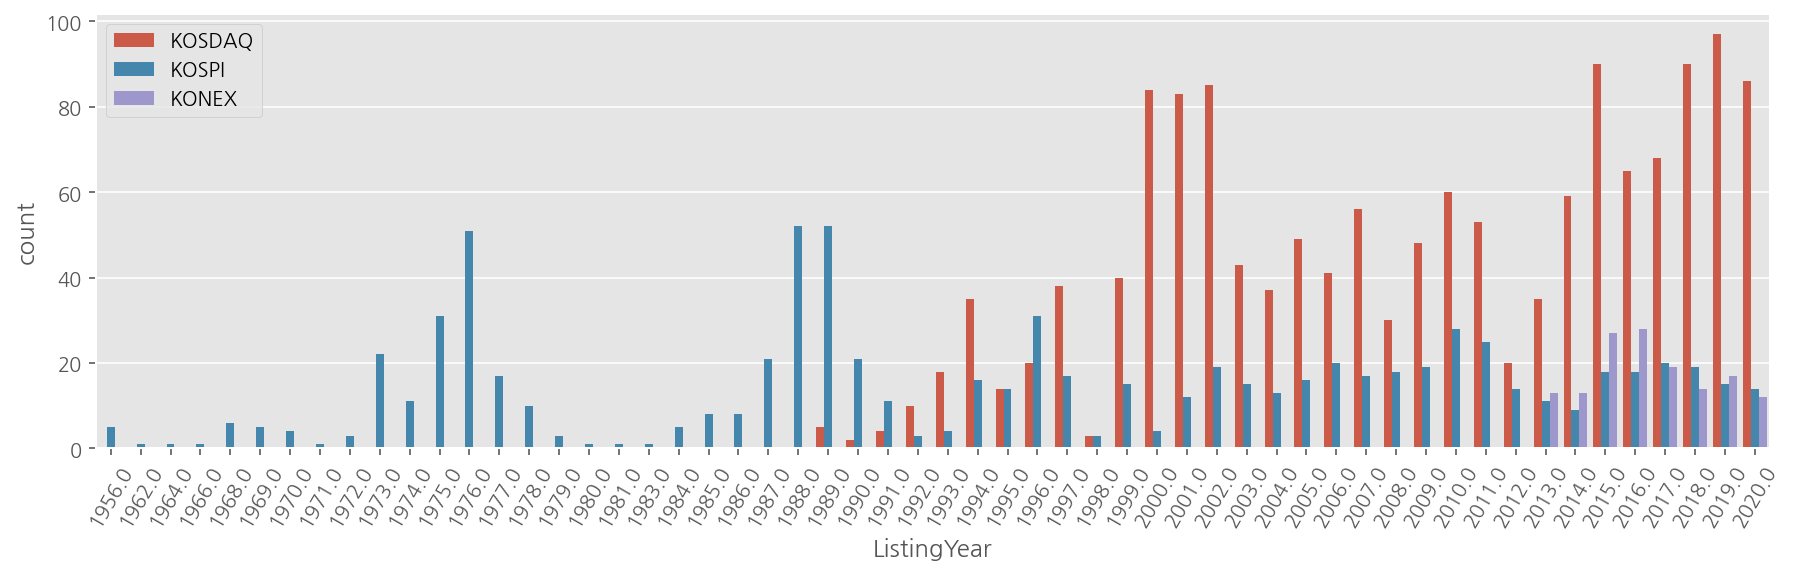

In [102]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='ListingYear', hue='Market')
plt.xticks(rotation=60)
plt.legend(loc='upper left')
plt.show()

<br>

**Pandas를 이용한 선 그래프 시각화**

In [103]:
df_market_year = pd.crosstab(df['Market'], df['ListingYear'])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


<AxesSubplot:xlabel='Market'>

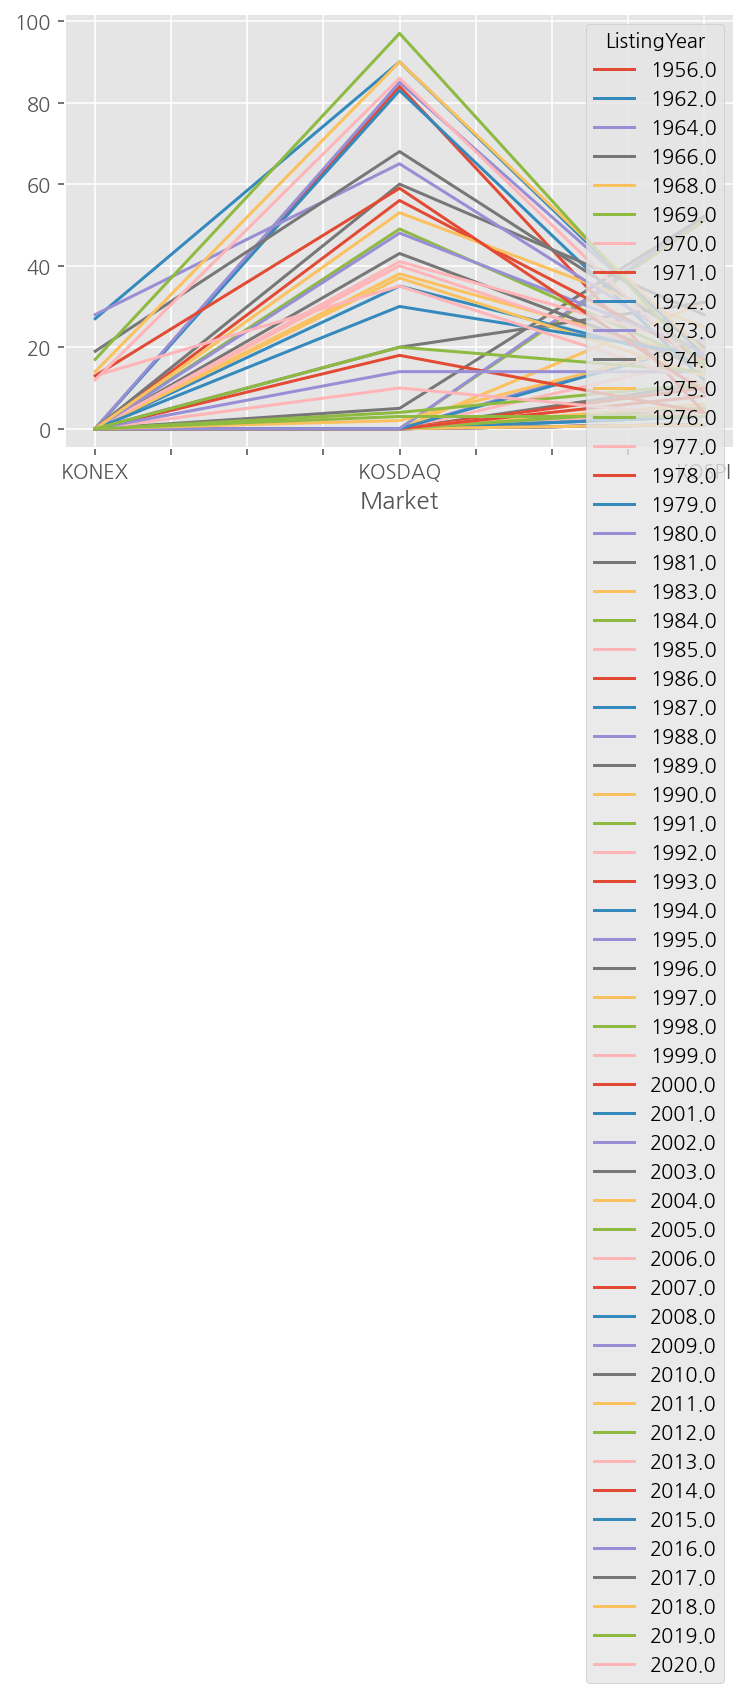

In [104]:
df_market_year.plot()

In [107]:
# 데이터 프레임의 T 속성을 사용하면 행과 열을 바꿔준다.
df_market_year.T.head()

Market,KONEX,KOSDAQ,KOSPI
ListingYear,,,
1956.0,0,0,5
1962.0,0,0,1
1964.0,0,0,1
1966.0,0,0,1
1968.0,0,0,6


<AxesSubplot:xlabel='ListingYear'>

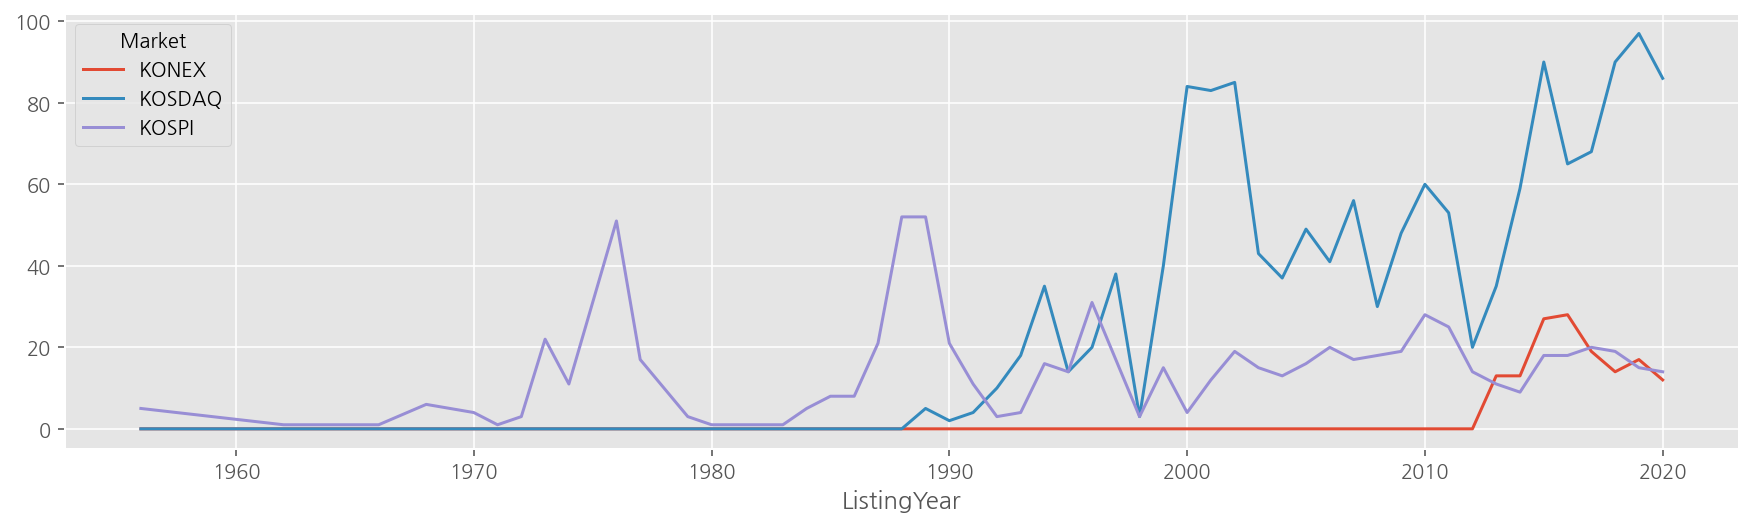

In [110]:
df_market_year.T.plot(figsize=(15,4))

<br>

**subplot으로 그리기**

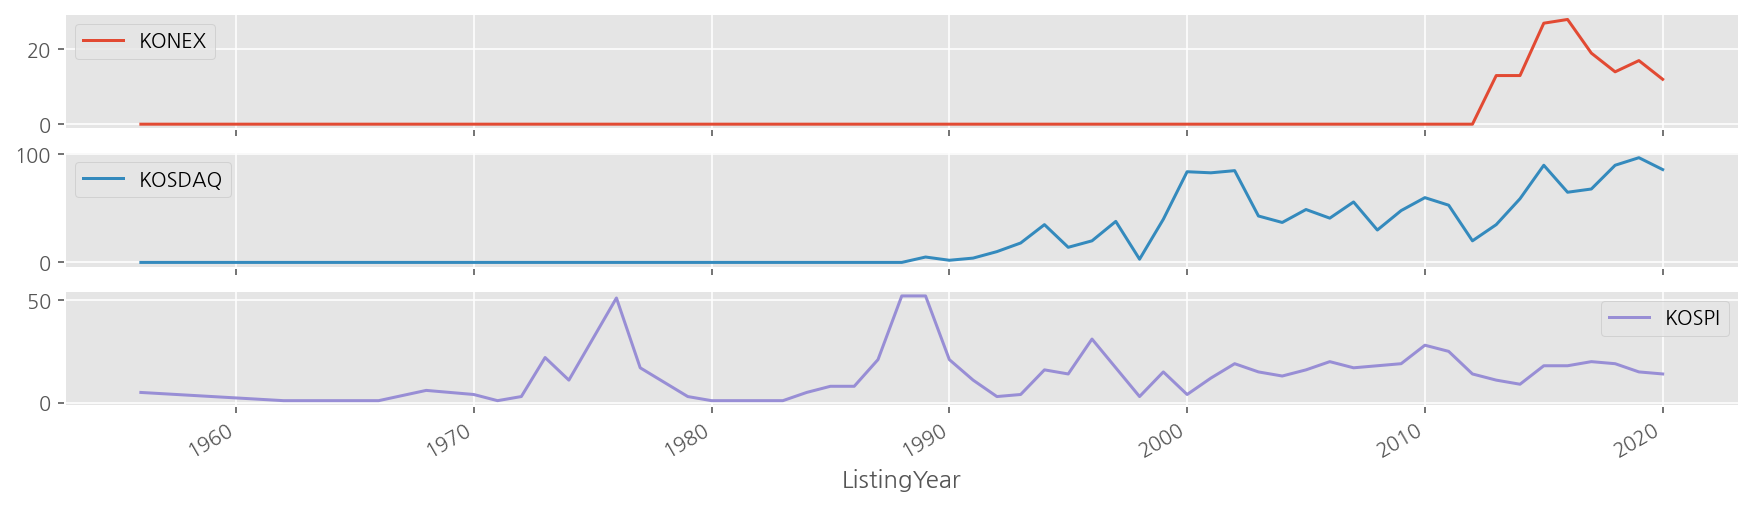

In [113]:
g = df_market_year.T.plot(figsize=(15,4), subplots=True)

<br>

**Pandas를 이용한 막대 그래프 시각화**

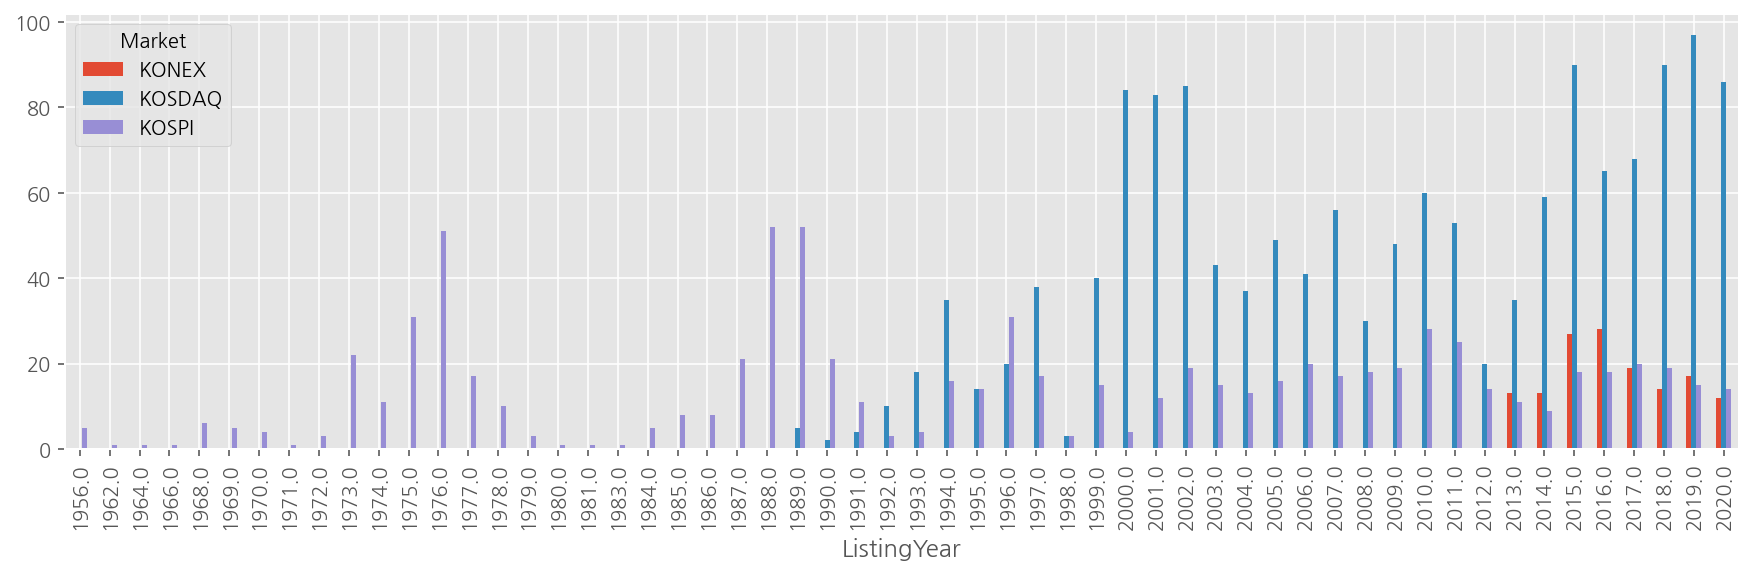

In [115]:
g = df_market_year.T.plot.bar(figsize=(15,4))